

### <b>Problem Statement</b>
A Chinese automobile company Geely Auto aspires to enter the US market by setting up their manufacturing unit there and producing cars locally to give competition to their US and European counterparts.

They have contracted an automobile consulting company to understand the factors on which the pricing of cars depends. Specifically, they want to understand the factors affecting the pricing of cars in the American market, since those may be very different from the Chinese market. The company wants to know:

Which variables are significant in predicting the price of a car
How well those variables describe the price of a car
Based on various market surveys, the consulting firm has gathered a large data set of different types of cars across the America market.

#### <b> Business Goal</b>
We are required to model the price of cars with the available independent variables. It will be used by the management to understand how exactly the prices vary with the independent variables. They can accordingly manipulate the design of the cars, the business strategy etc. to meet certain price levels. Further, the model will be a good way for management to understand the pricing dynamics of a new market.

#### <b> Importing the required libraries and Dataset

In [1]:
## Importing all the required libraries

import pandas as pd
import numpy as np
from numpy import math
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

import warnings
warnings.filterwarnings("ignore")

In [2]:
## Import the drive

from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [3]:
## Import data

path = "/content/drive/MyDrive/AlmaBetter/Machine Learning/Regression Analysis, Cross Validation and Hyparameter tuning/Data /Notes/Copy of CarPrice_project.csv"

dataset = pd.read_csv(path)

### <b> Data Inspection

In [4]:
dataset.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

### <b>DataSet Information:</b>

Car_ID: Unique id of each observation (Interger)

Symboling: Its assigned insurance risk rating, A value of +3 indicates that the auto is risky, -3 that it is probably pretty safe.(Categorical)

CarName: Name of car company (Categorical)

fueltype: Car fuel type i.e gas or diesel (Categorical)

aspiration: Aspiration used in a car (Categorical)

doornumber: Number of doors in a car (Categorical)

carbody: body of car (Categorical)

drivewheel: type of drive wheel (Categorical)

enginelocation: Location of car engine (Categorical)

wheelbase: Weelbase of car (Numeric)

carlength: Length of car (Numeric)

carwidth: Width of car (Numeric)

carheight: height of car (Numeric)

curbweight: The weight of a car without occupants or baggage. (Numeric)

enginetype: Type of engine. (Categorical)

cylindernumber: cylinder placed in the car (Categorical)

enginesize: Size of car (Numeric)

fuelsystem: Fuel system of car (Categorical)

boreratio: Boreratio of car (Numeric)

stroke: Stroke or volume inside the engine (Numeric)

compressionratio: compression ratio of car (Numeric)

horsepower: Horsepower (Numeric)

peakrpm: car peak rpm (Numeric)

citympg: Mileage in city (Numeric)

highwaympg: Mileage on highway (Numeric)

price(Dependent variable): Price of car (Numeric)

In [6]:
dataset.describe(include = "all")

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205,205,205,205,205,205,205,205.000000,...,205.000000,205,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
unique,NaN,NaN,147,2,2,2,5,3,2,NaN,...,NaN,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,toyota corona,gas,std,four,sedan,fwd,front,NaN,...,NaN,mpfi,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,6,185,168,115,96,120,202,NaN,...,NaN,94,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,103.000000,0.834146,NaN,NaN,NaN,NaN,NaN,NaN,NaN,98.756585,...,126.907317,NaN,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.021776,...,41.642693,NaN,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,86.600000,...,61.000000,NaN,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,94.500000,...,97.000000,NaN,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,97.000000,...,120.000000,NaN,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,102.400000,...,141.000000,NaN,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000


In [7]:
# Check for duplications
len(dataset[dataset.duplicated()])

0

# <b>Exploratory Data Analysis

<Axes: xlabel='price', ylabel='Density'>

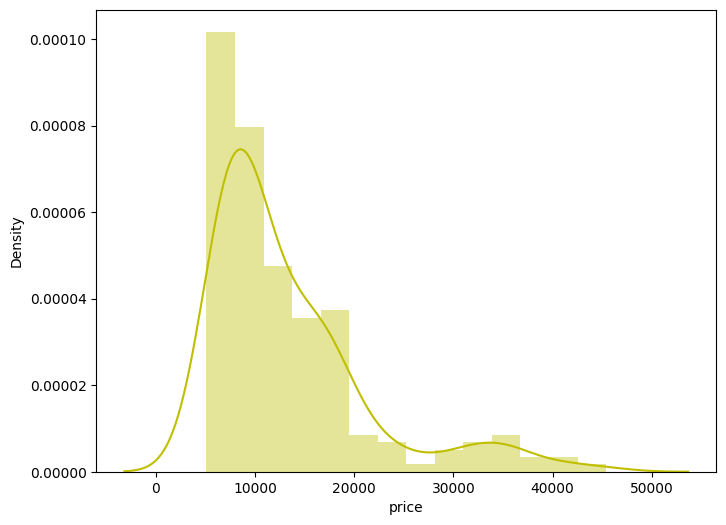

In [8]:
plt.figure(figsize = (8,6))
sns.distplot(dataset["price"], color = "y")

<Axes: xlabel='price', ylabel='Density'>

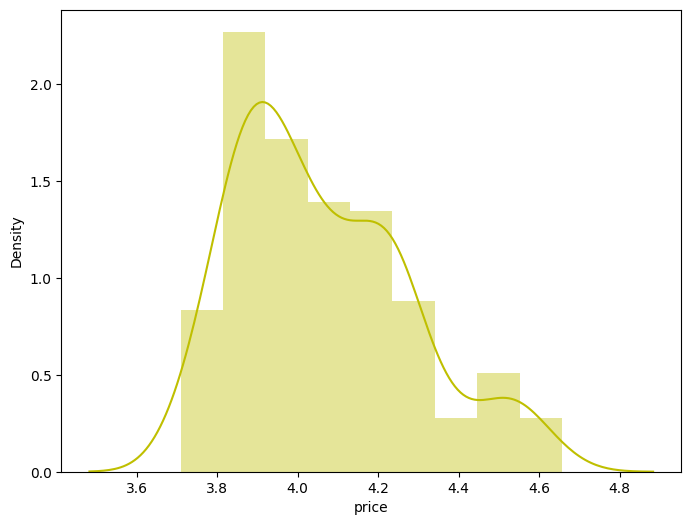

In [9]:
## Now let's do a log transformation to reduce the skewness
plt.figure(figsize = (8,6))
sns.distplot(np.log10(dataset["price"]), color = "y")

In [10]:
numeric_features = dataset.describe().columns
numeric_features

Index(['car_ID', 'symboling', 'wheelbase', 'carlength', 'carwidth',
       'carheight', 'curbweight', 'enginesize', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

### Default title text


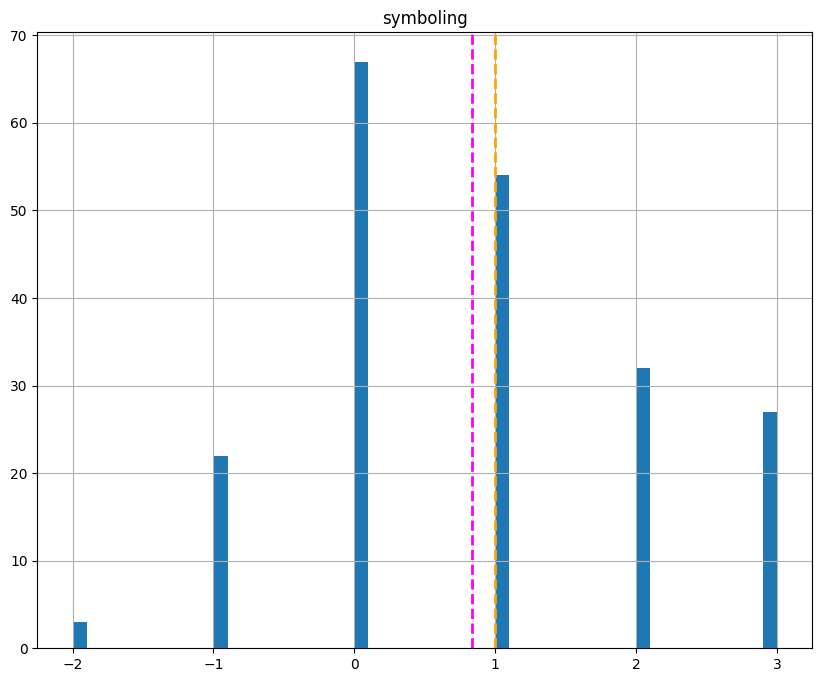

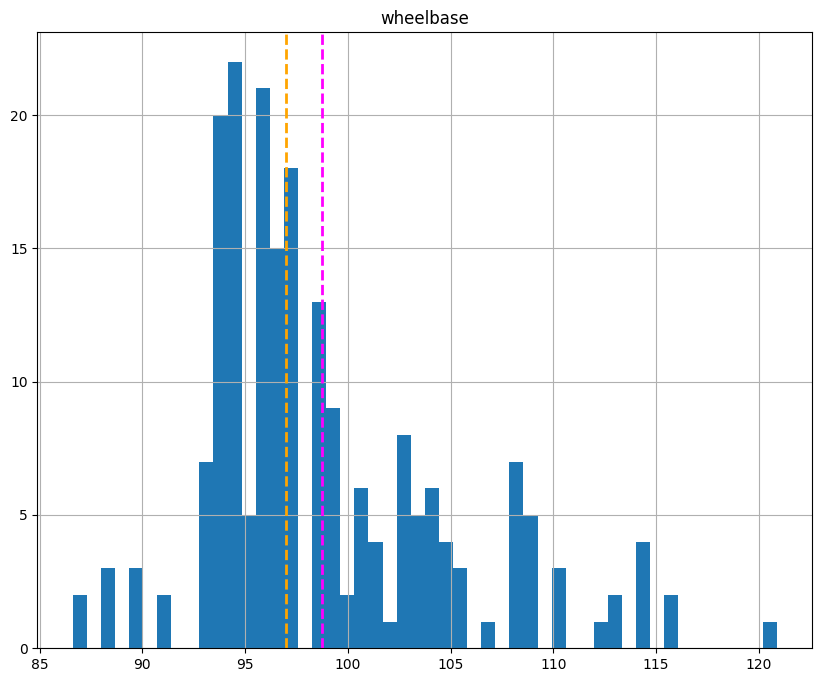

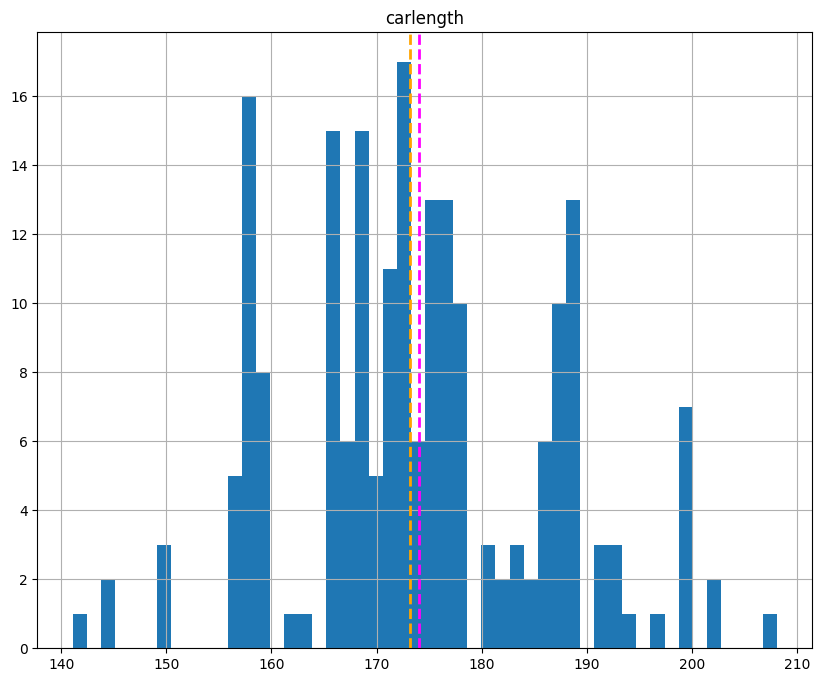

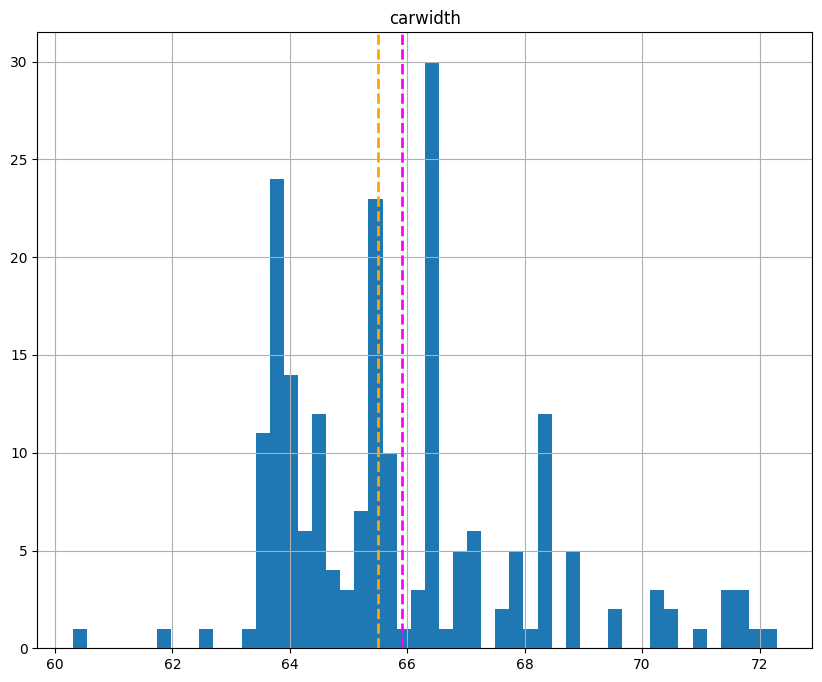

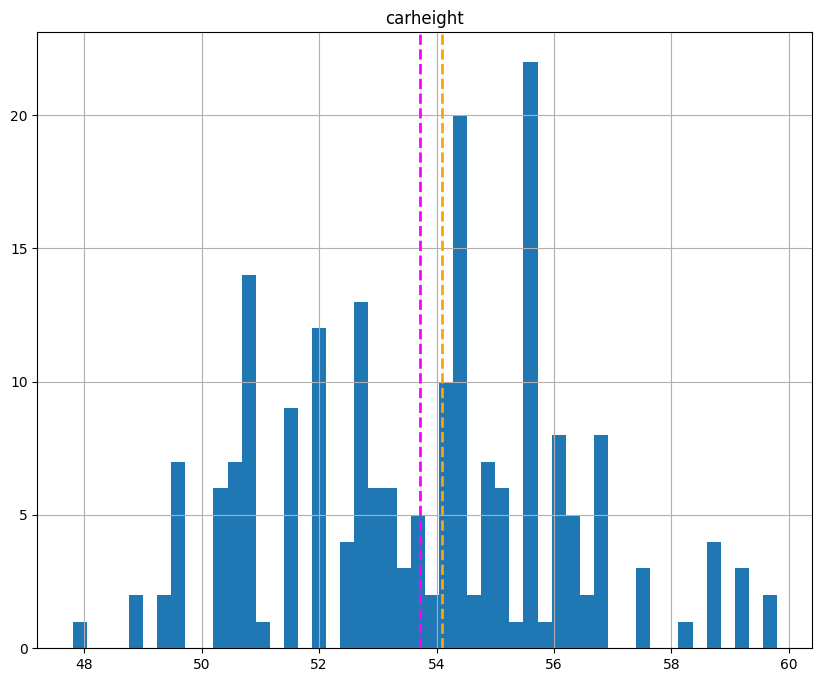

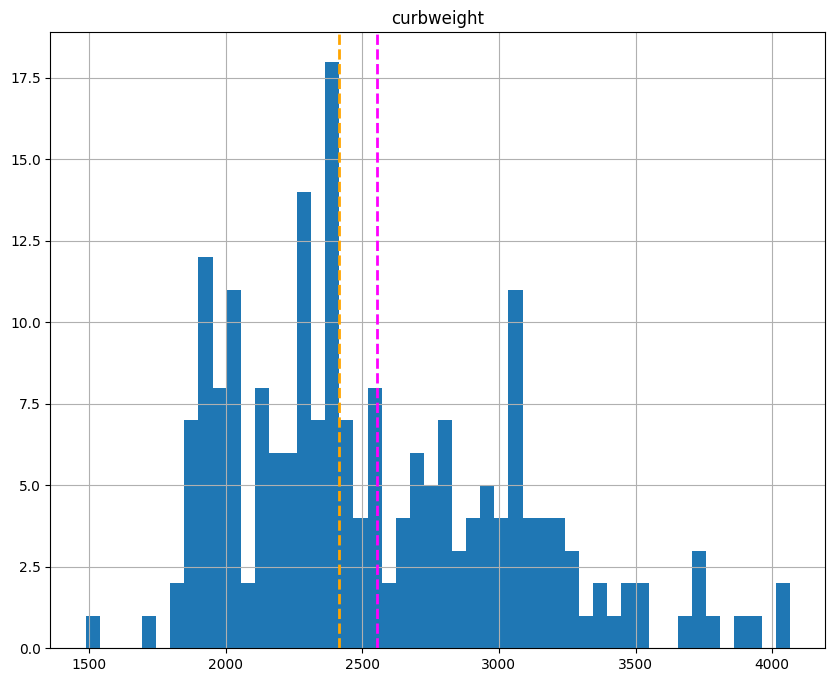

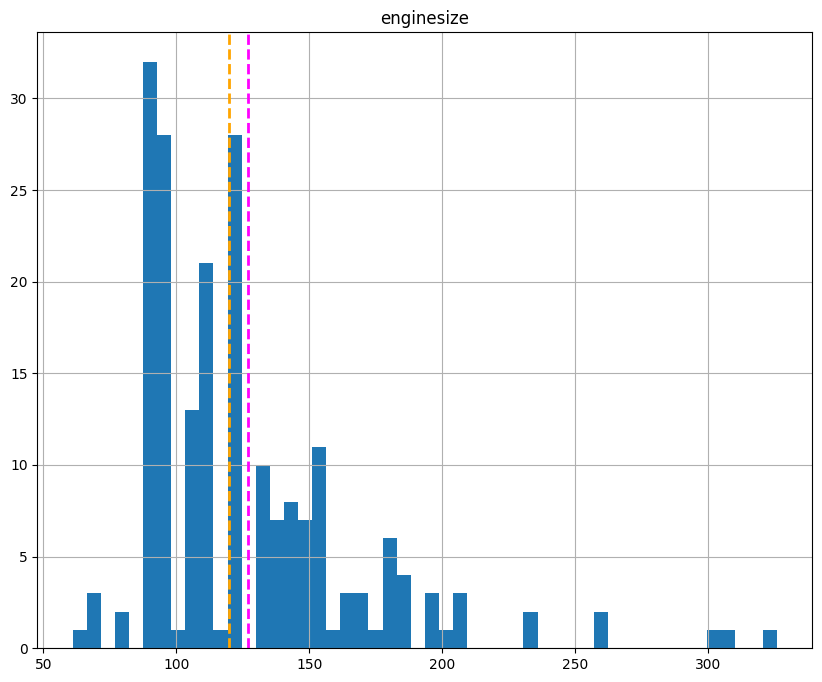

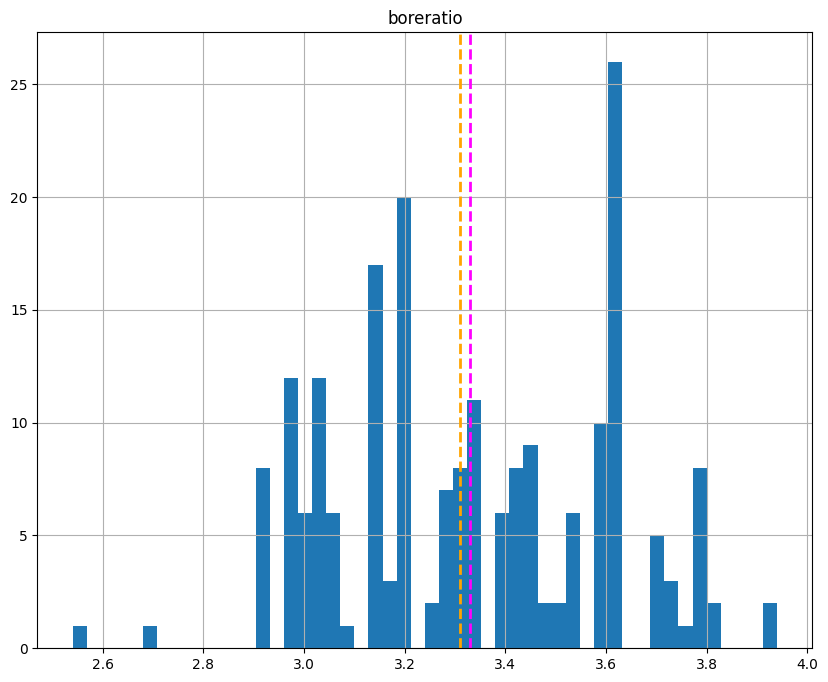

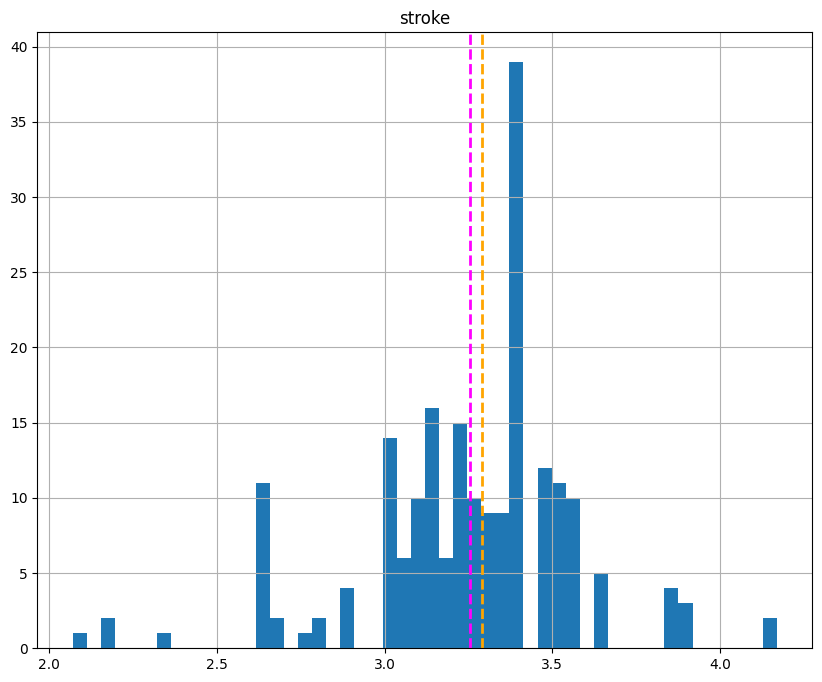

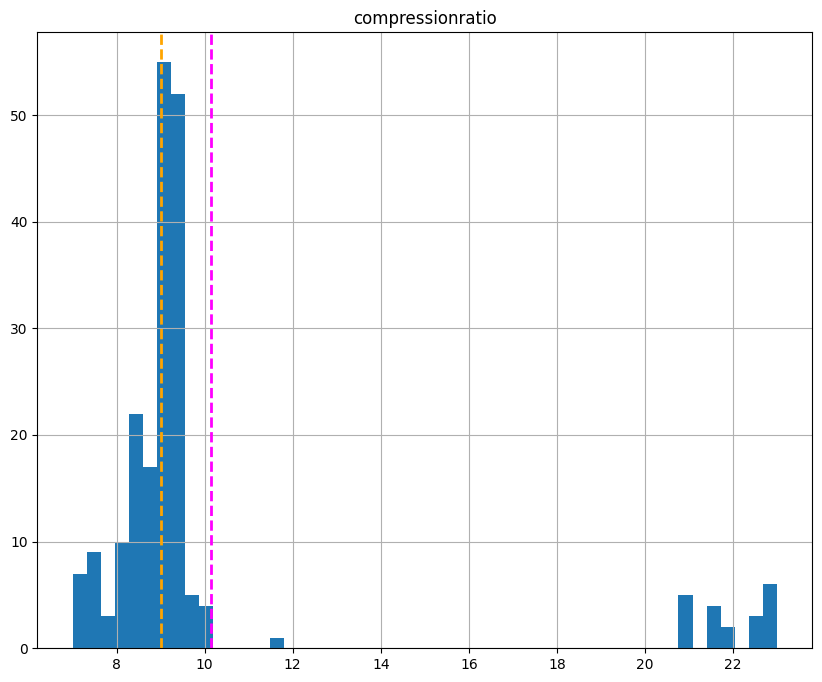

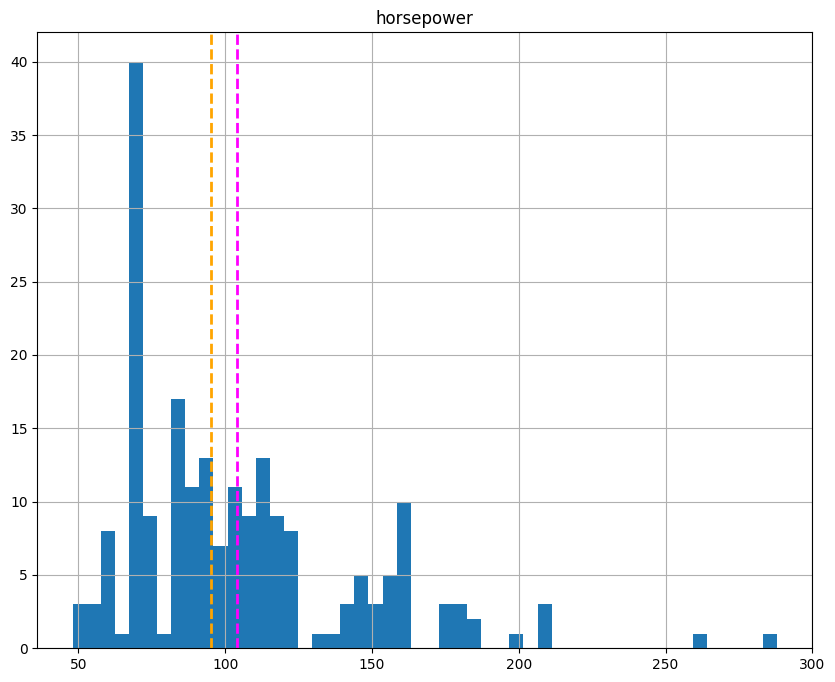

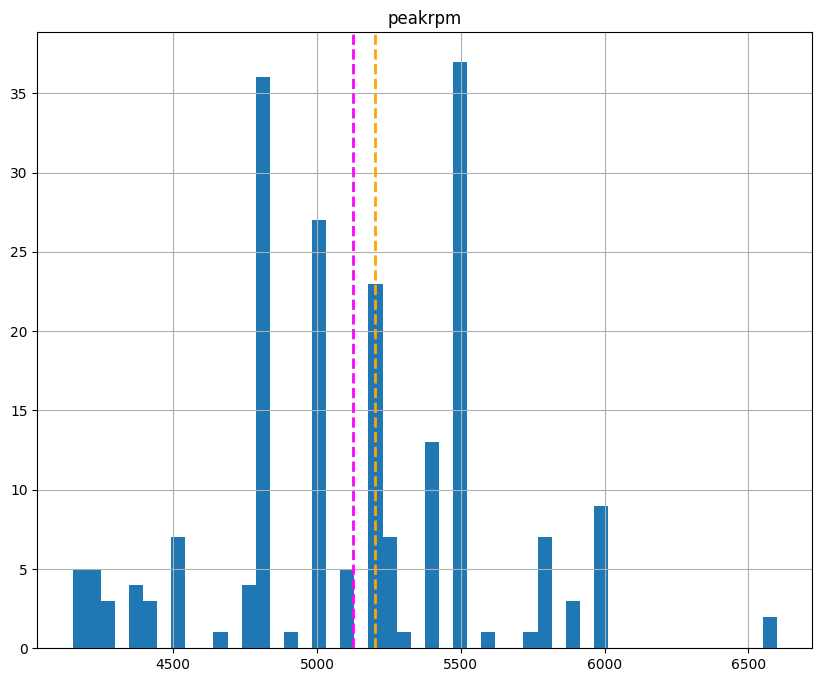

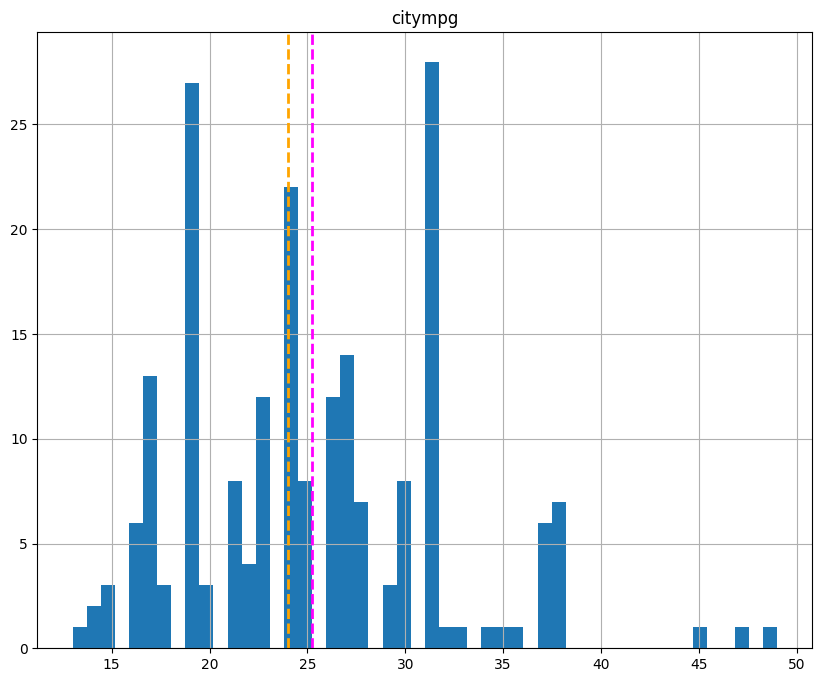

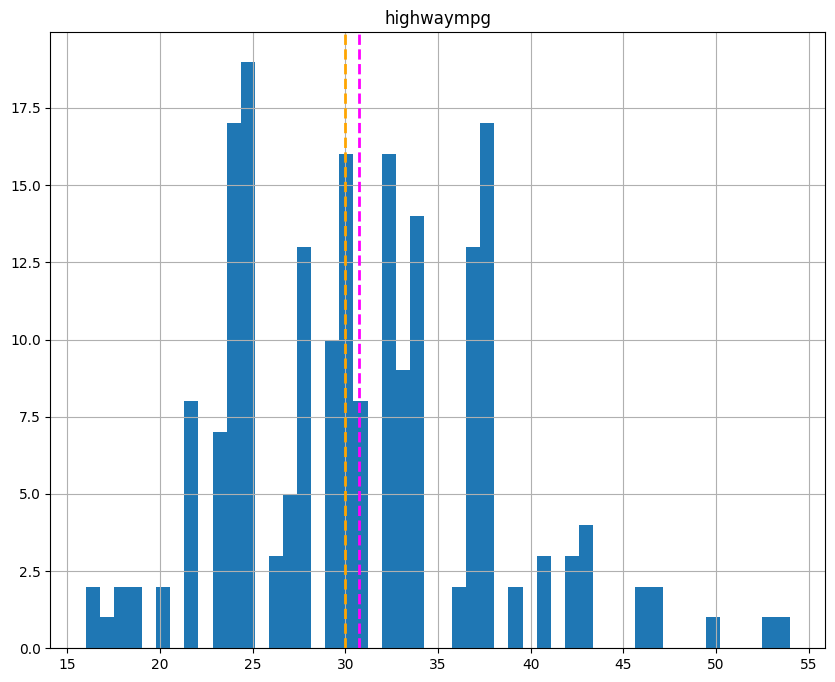

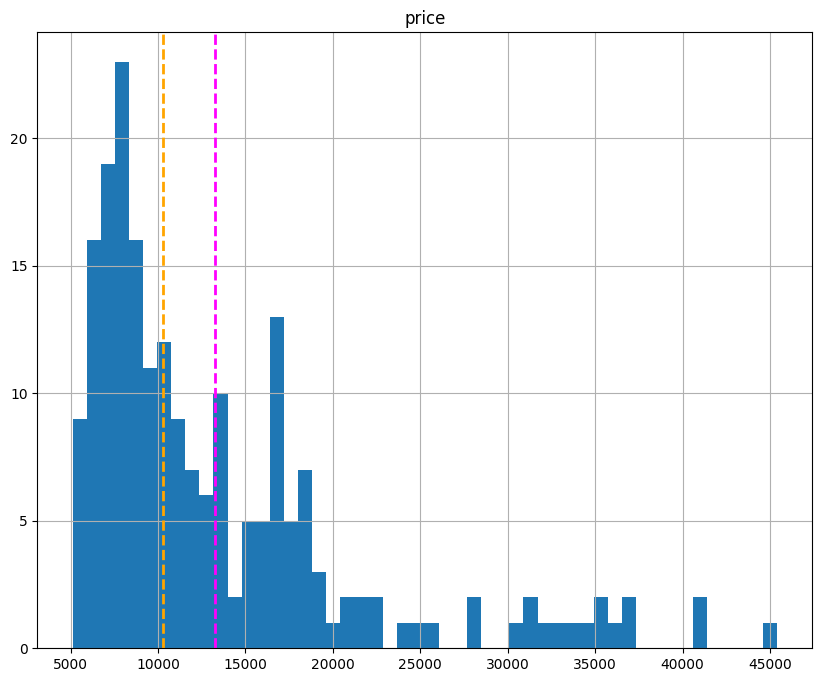

In [11]:
for col in numeric_features[1:]:
  fig = plt.figure(figsize = (10,8))
  ax = fig.gca()
  feature = dataset[col]
  feature.hist(bins = 50, ax = ax)
  ax.axvline(feature.mean(), color = "magenta", linewidth = 2, linestyle = "dashed")
  ax.axvline(feature.median(), color = "orange", linewidth = 2, linestyle = "dashed")
  ax.set_title(col)

plt.show()


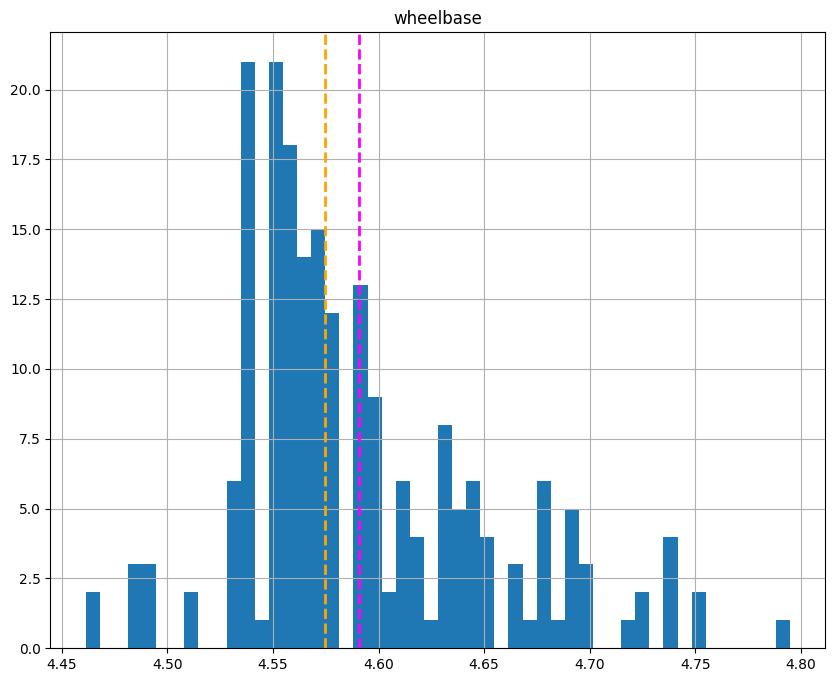

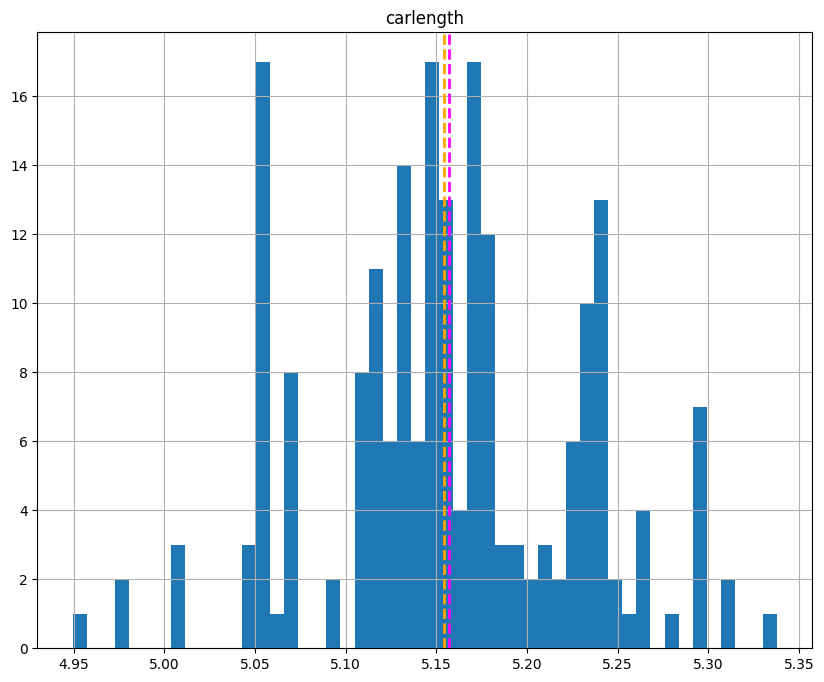

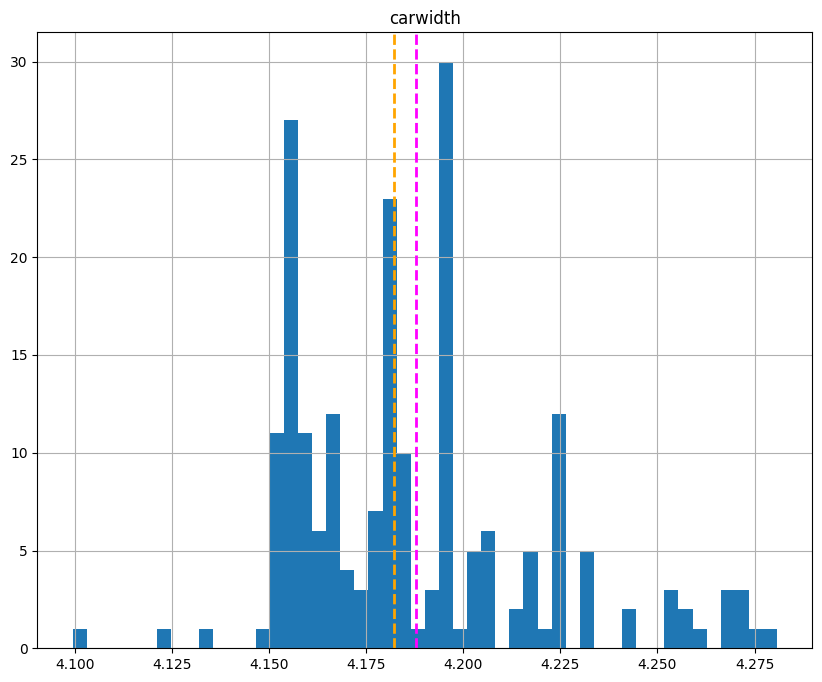

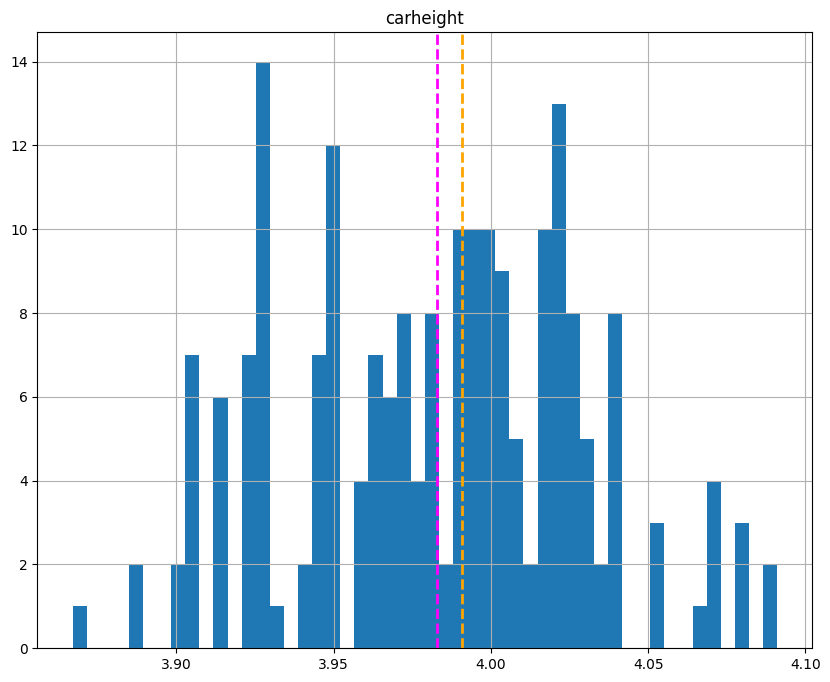

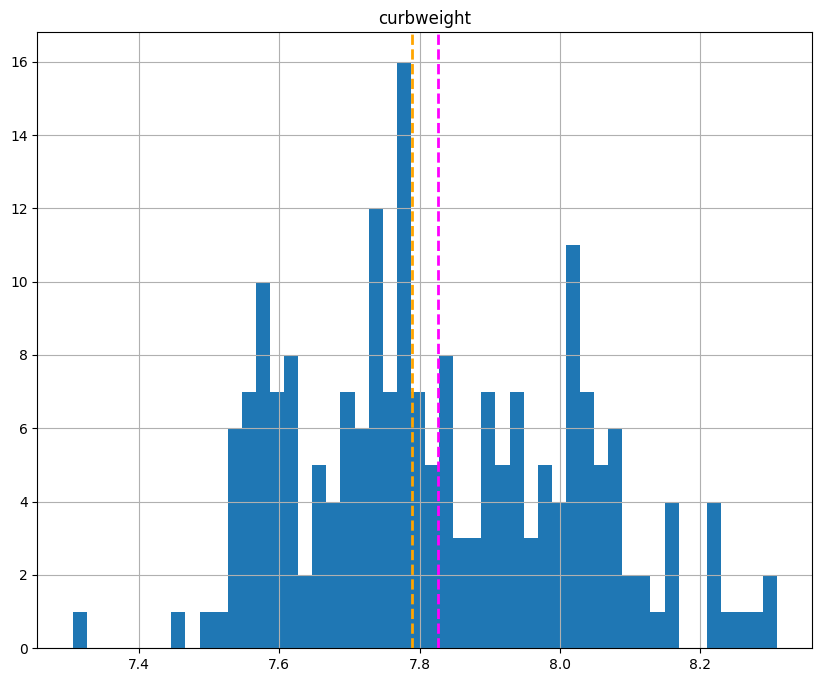

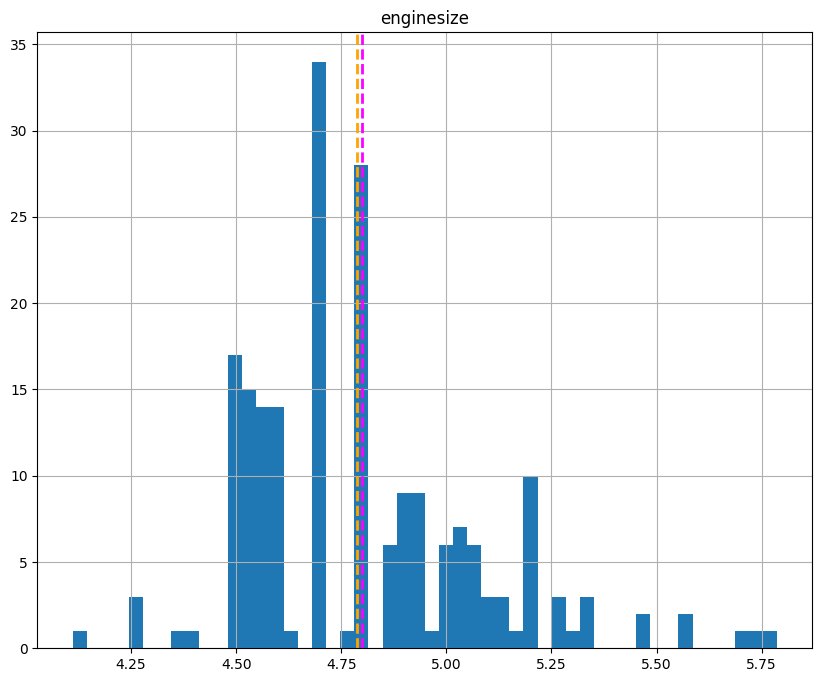

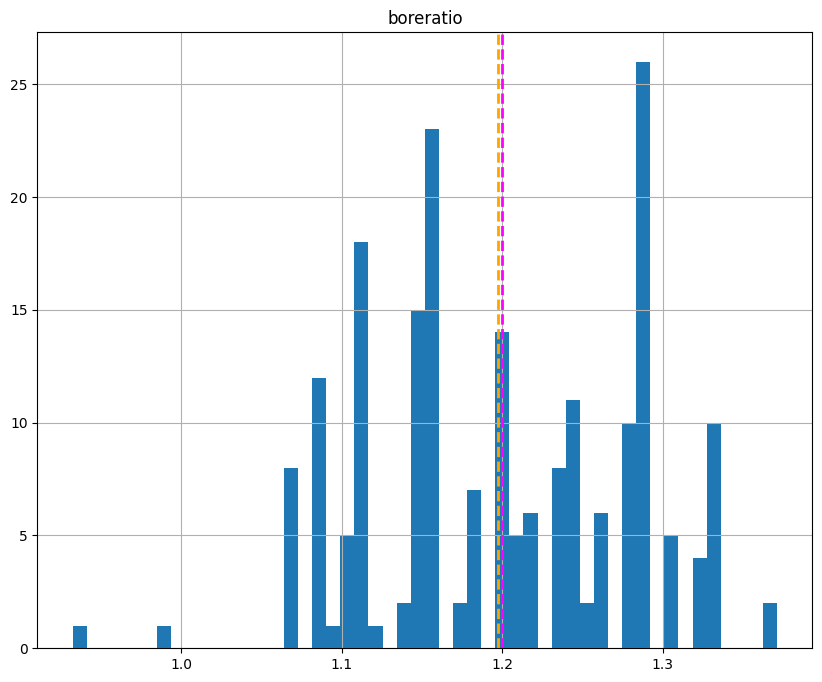

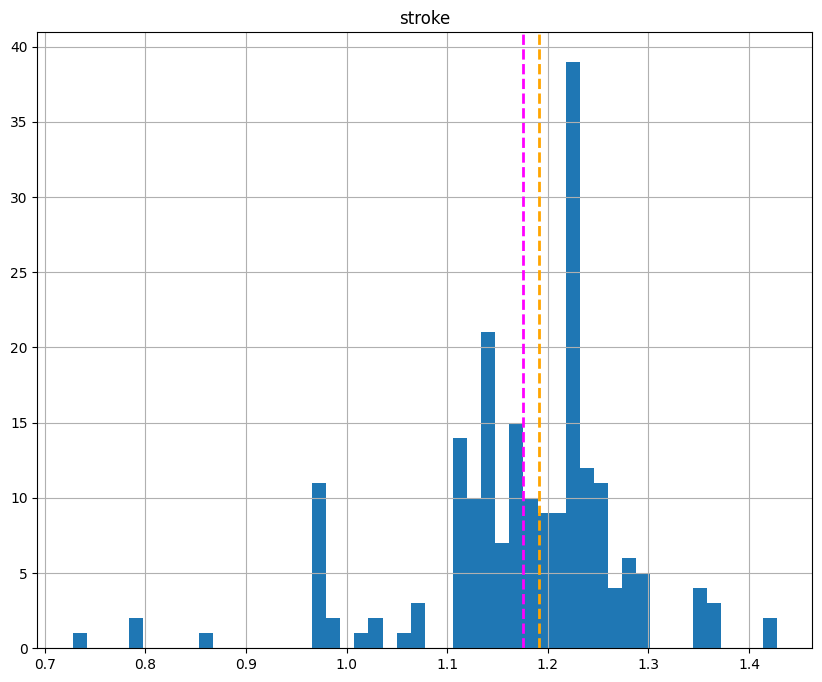

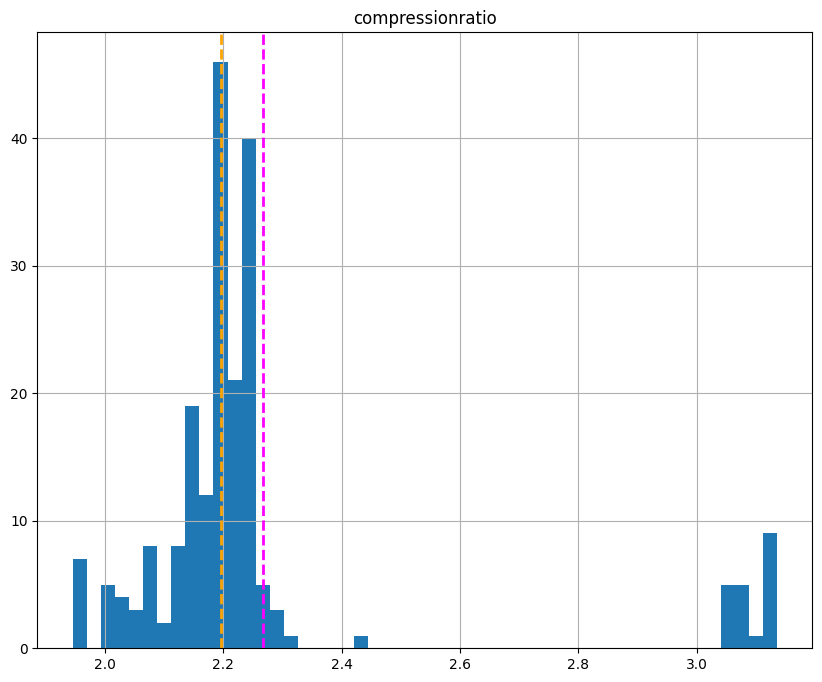

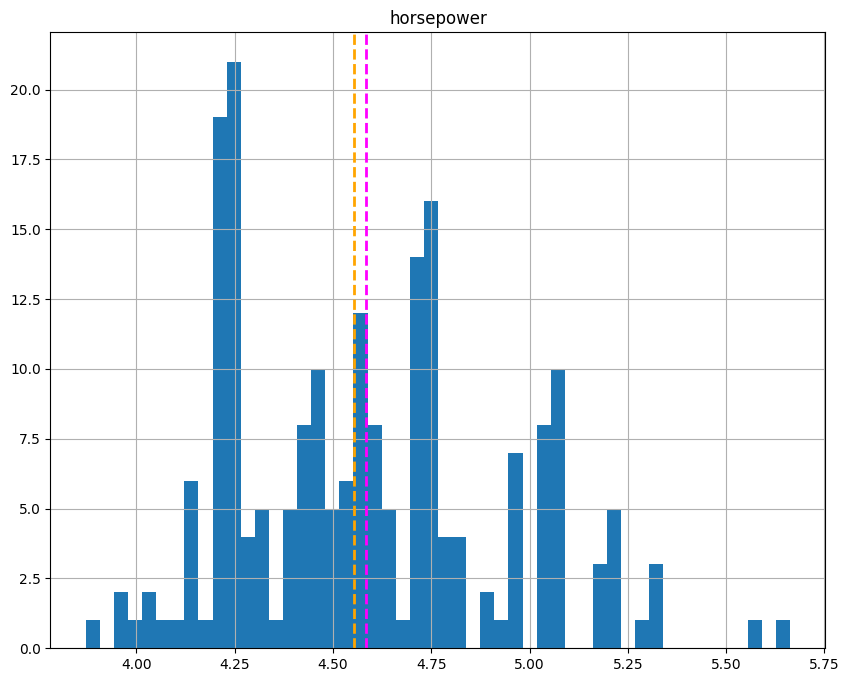

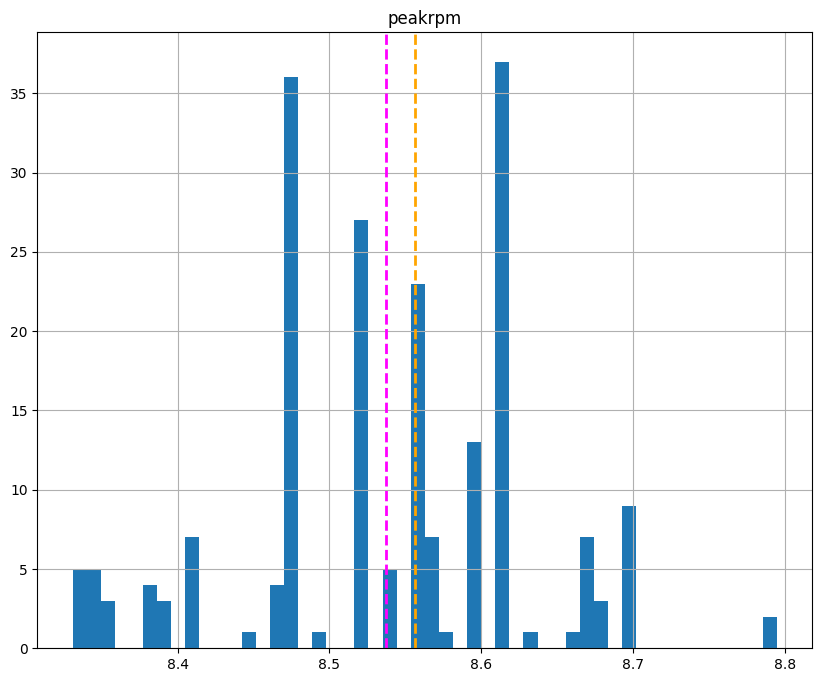

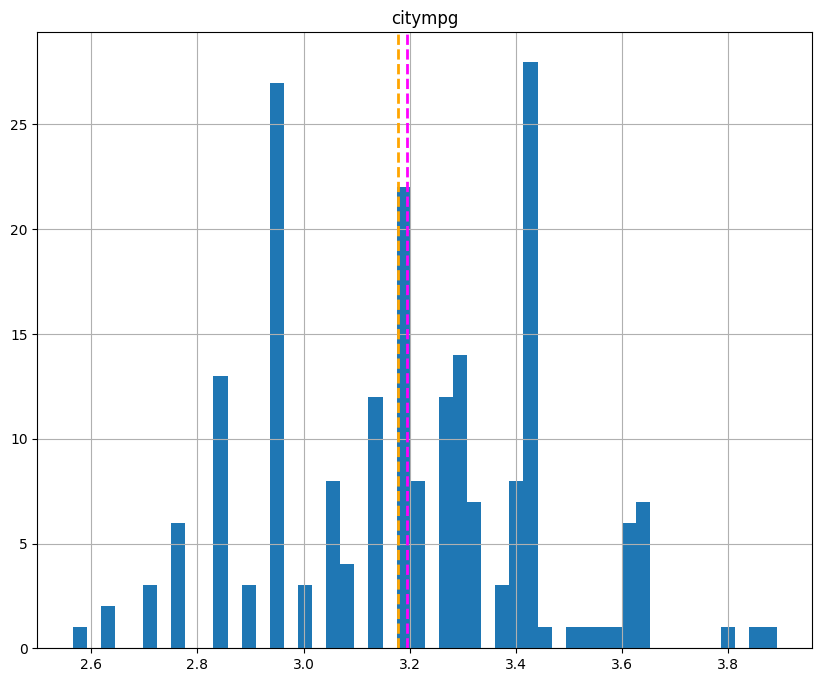

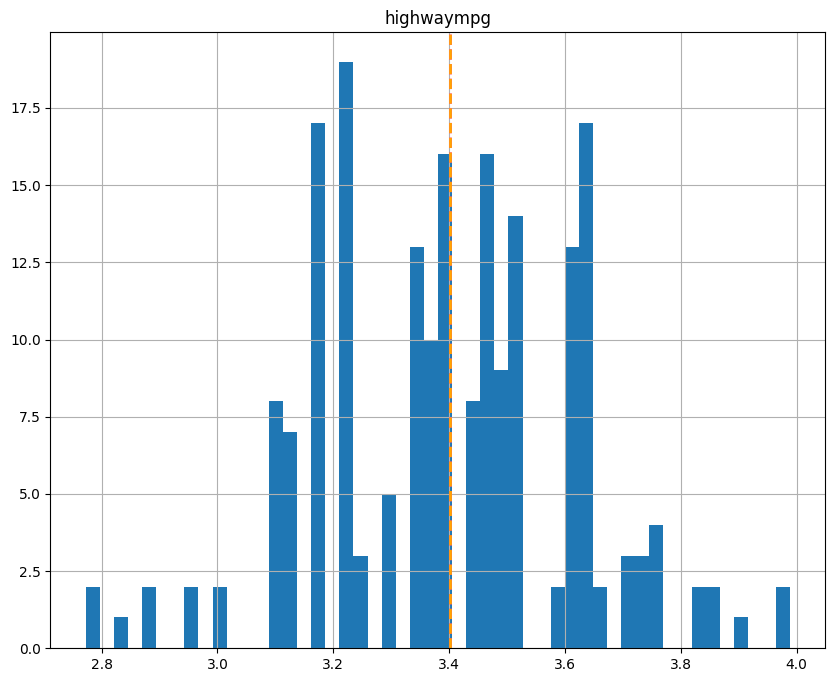

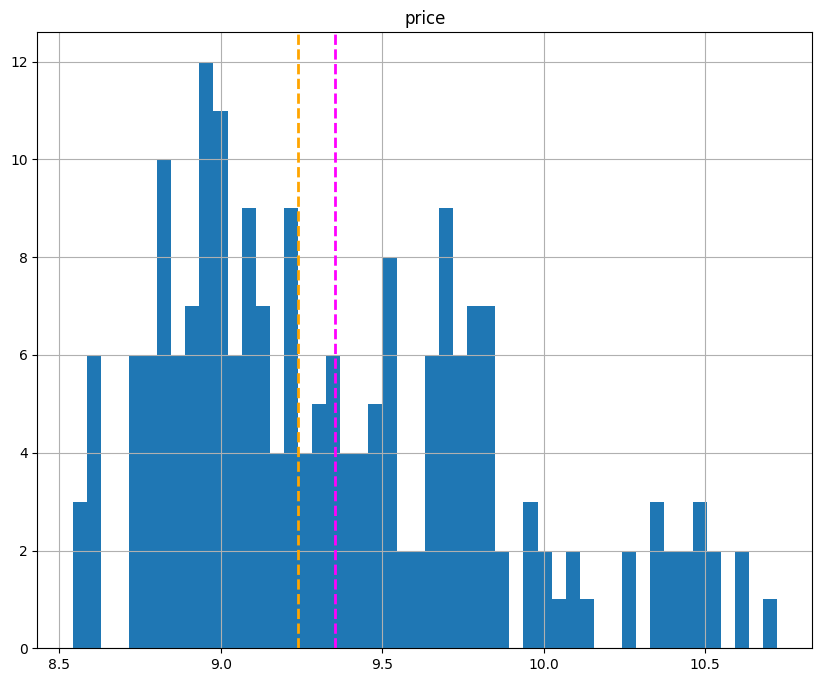

In [12]:
for col in numeric_features[2:]:
  fig = plt.figure(figsize = (10,8))
  ax = fig.gca()
  feature = np.log(dataset[col])
  feature.hist(bins = 50, ax = ax)
  ax.axvline(feature.mean(), color = "magenta", linewidth = 2, linestyle = "dashed")
  ax.axvline(feature.median(), color = "orange", linewidth = 2, linestyle = "dashed")
  ax.set_title(col)

plt.show()

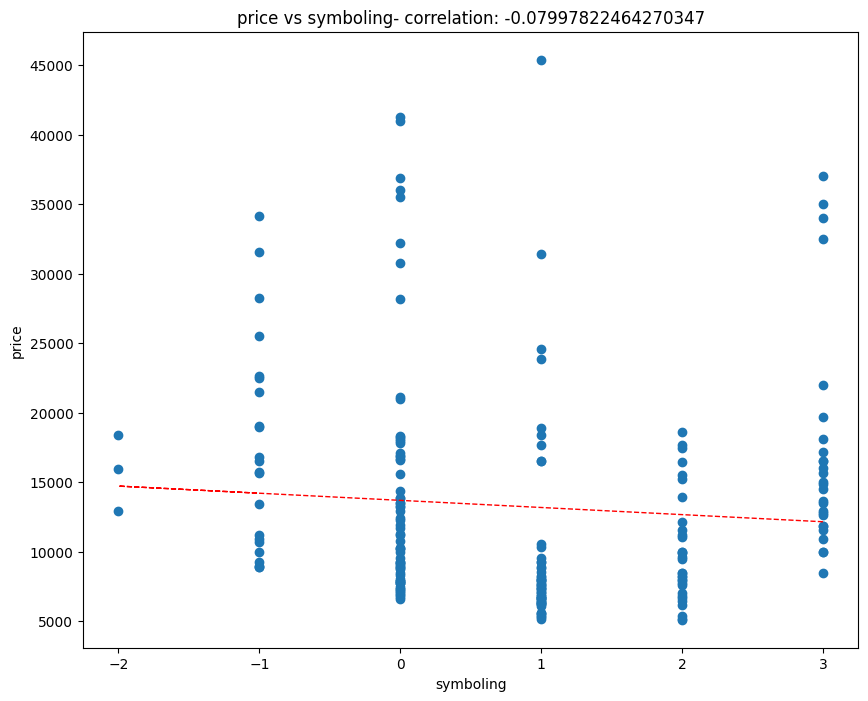

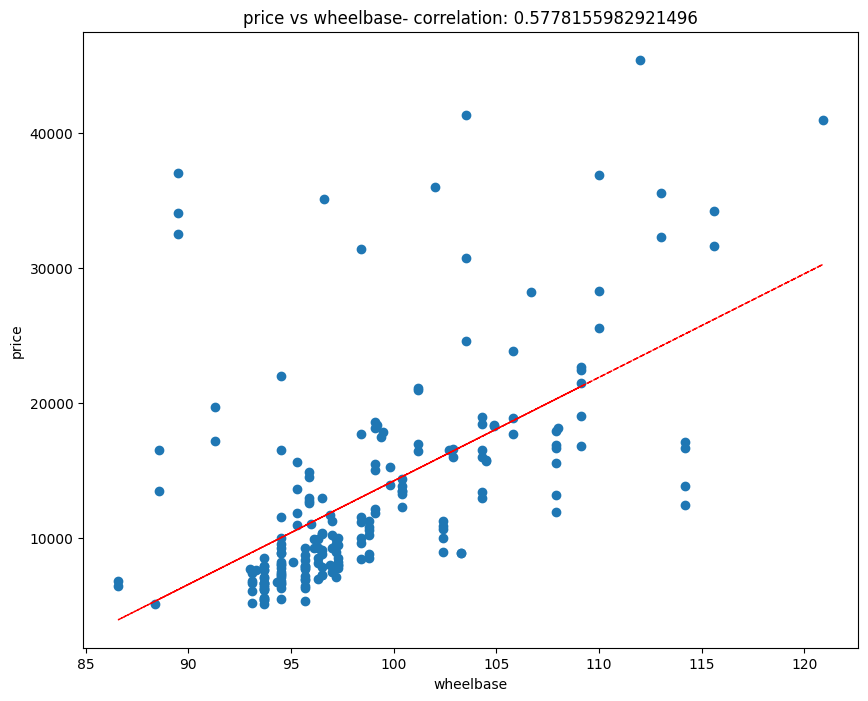

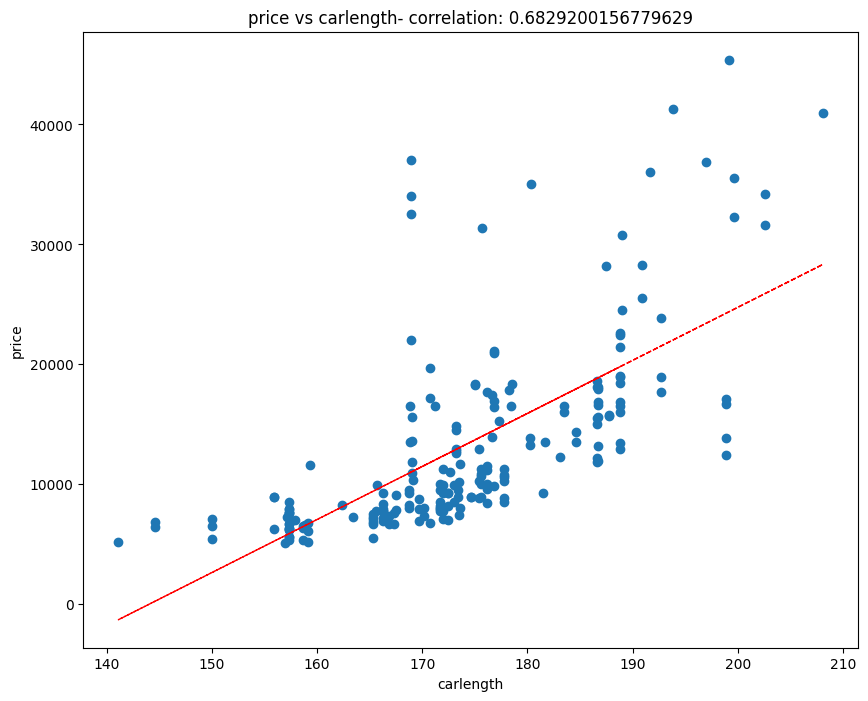

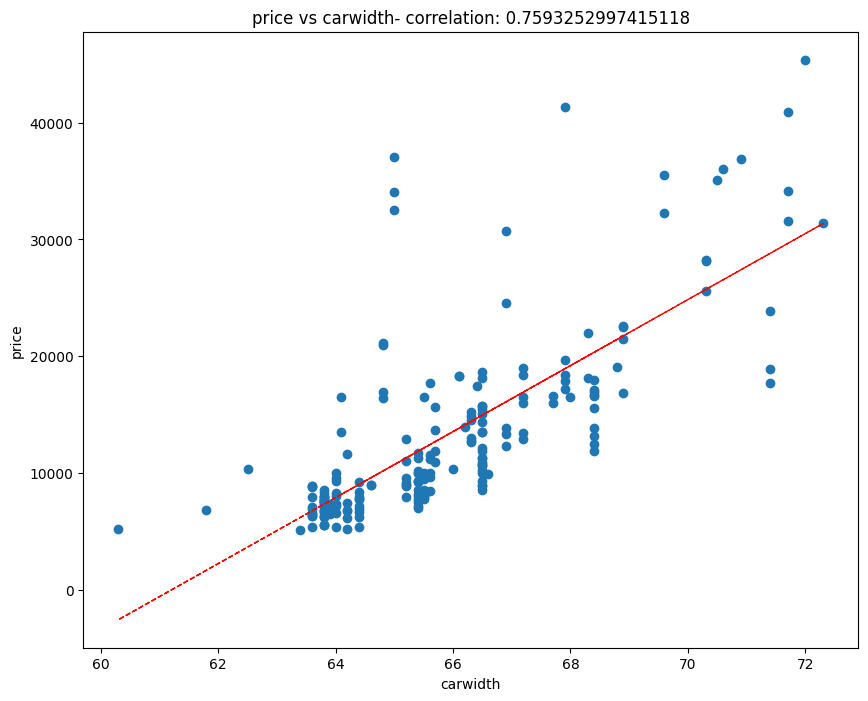

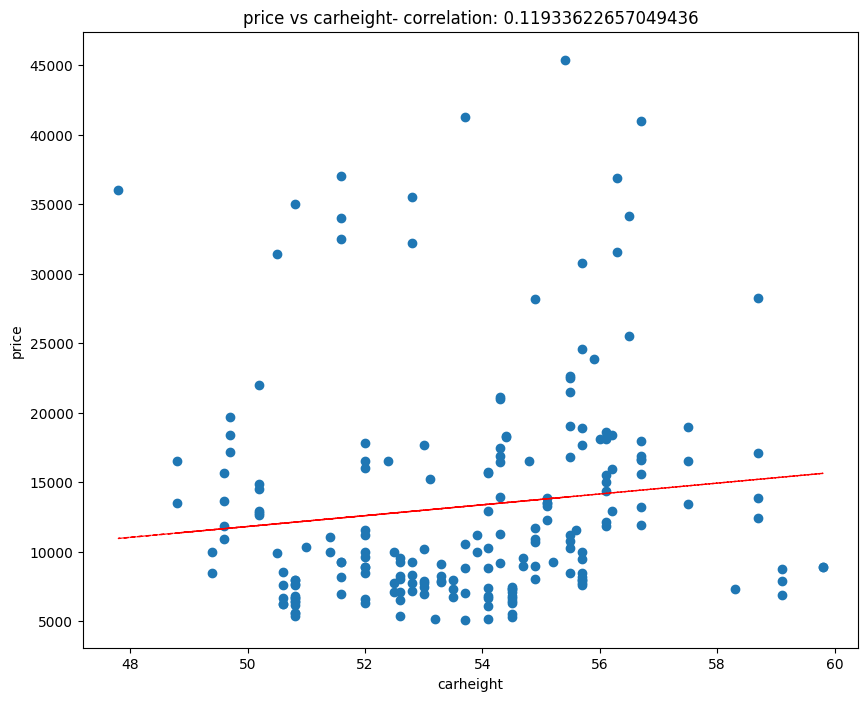

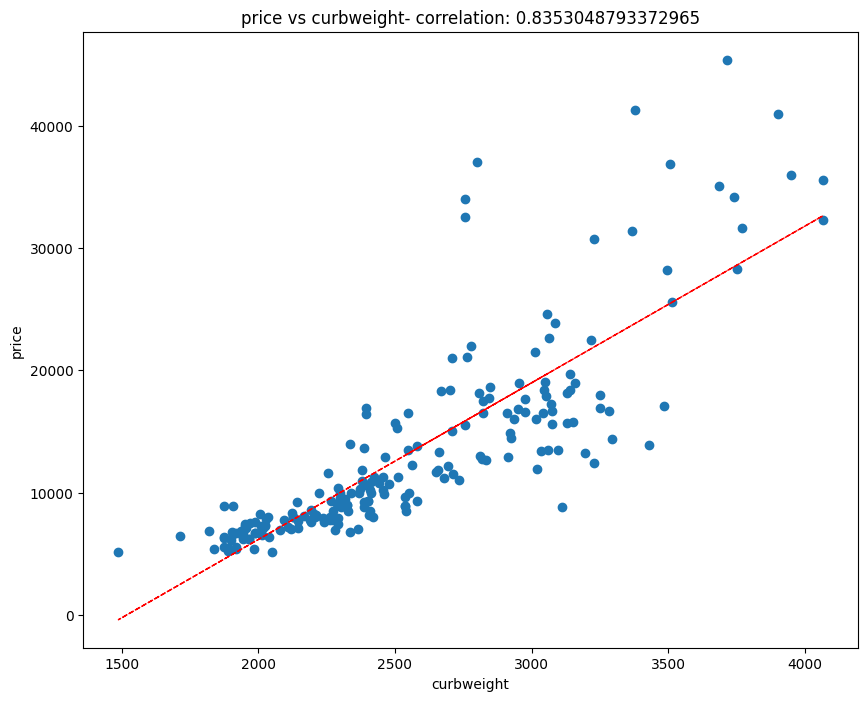

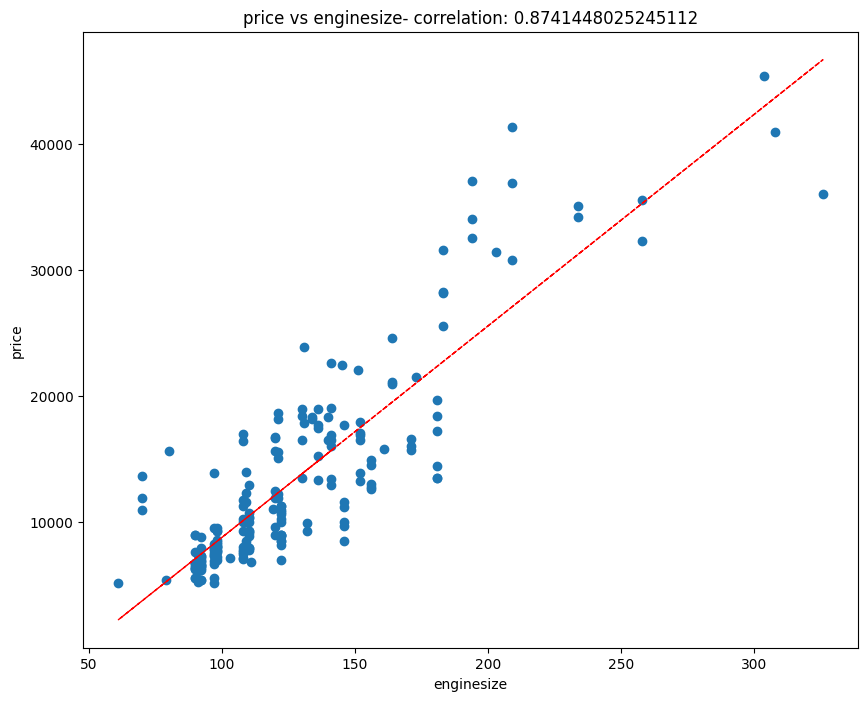

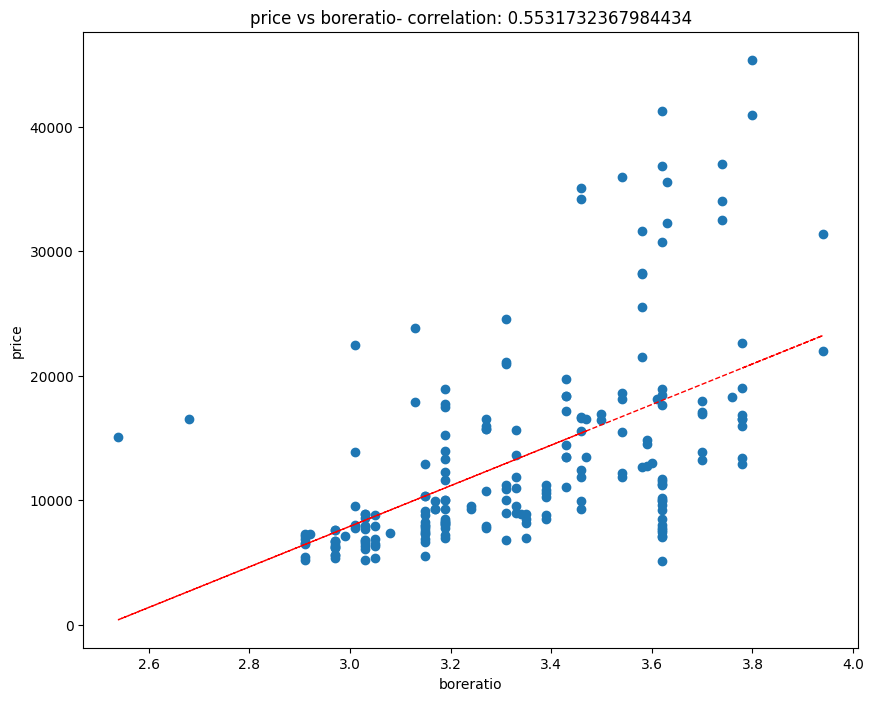

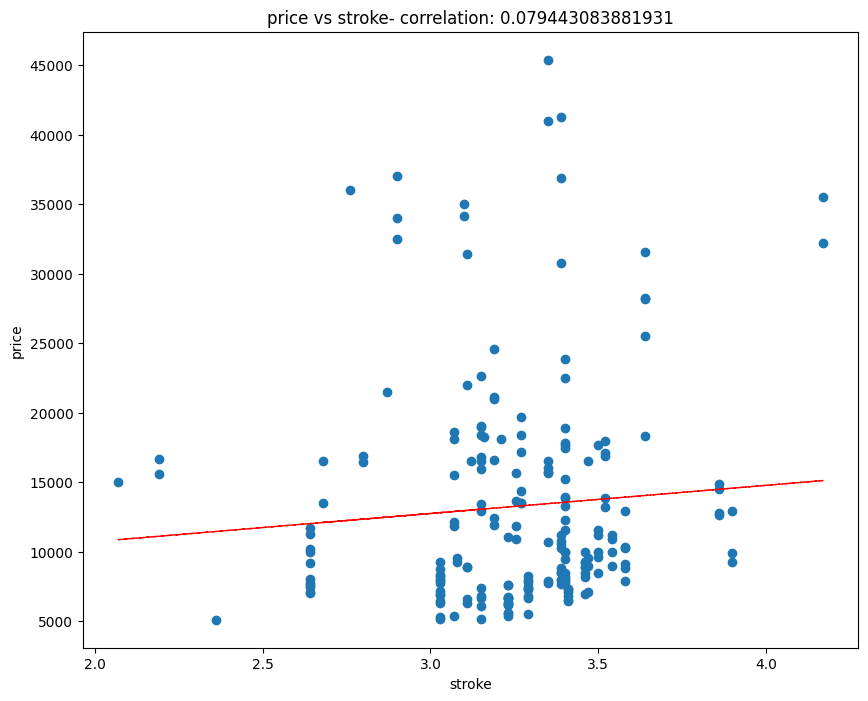

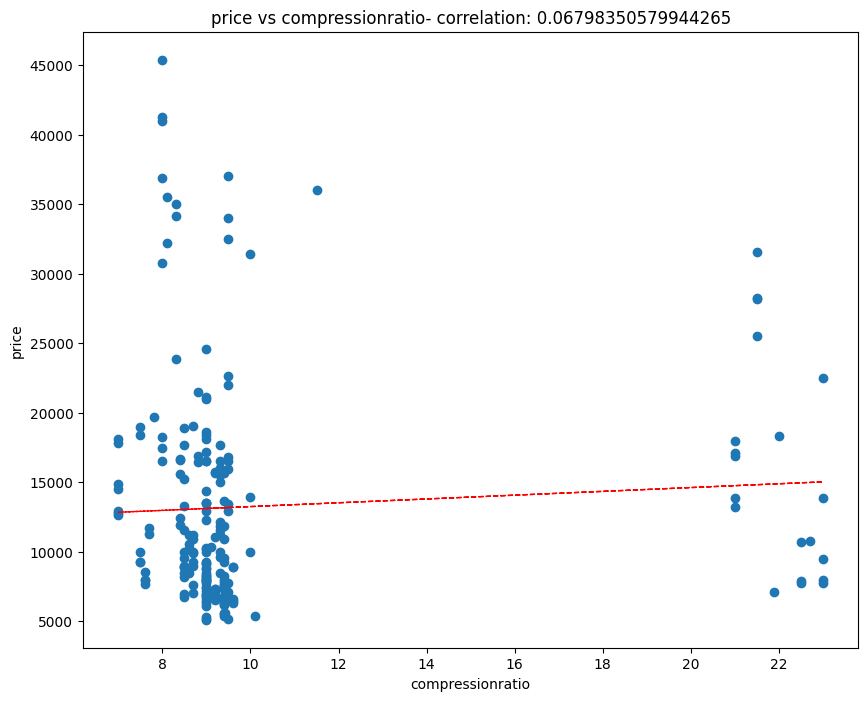

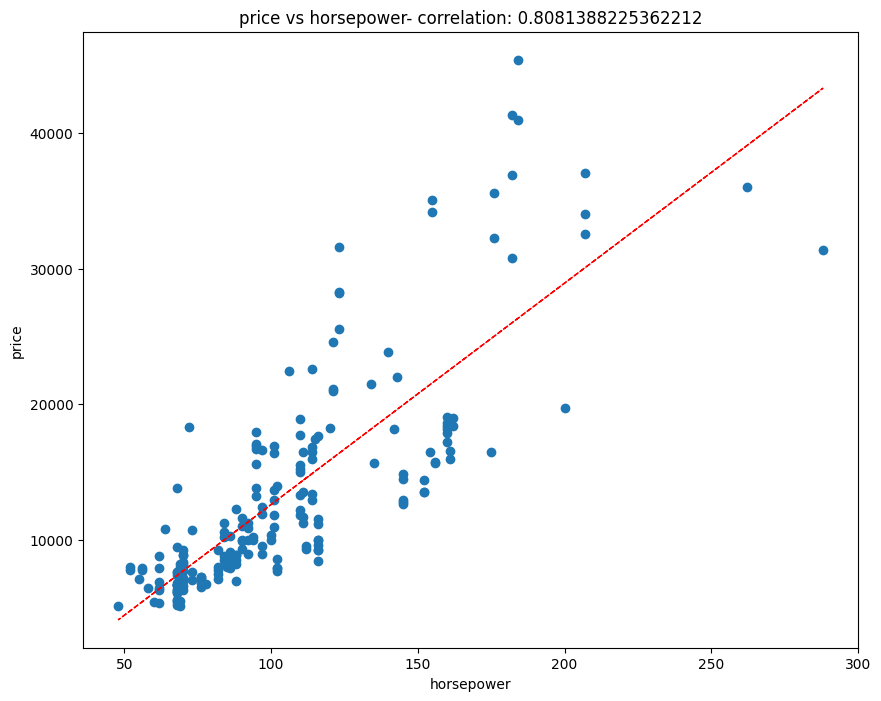

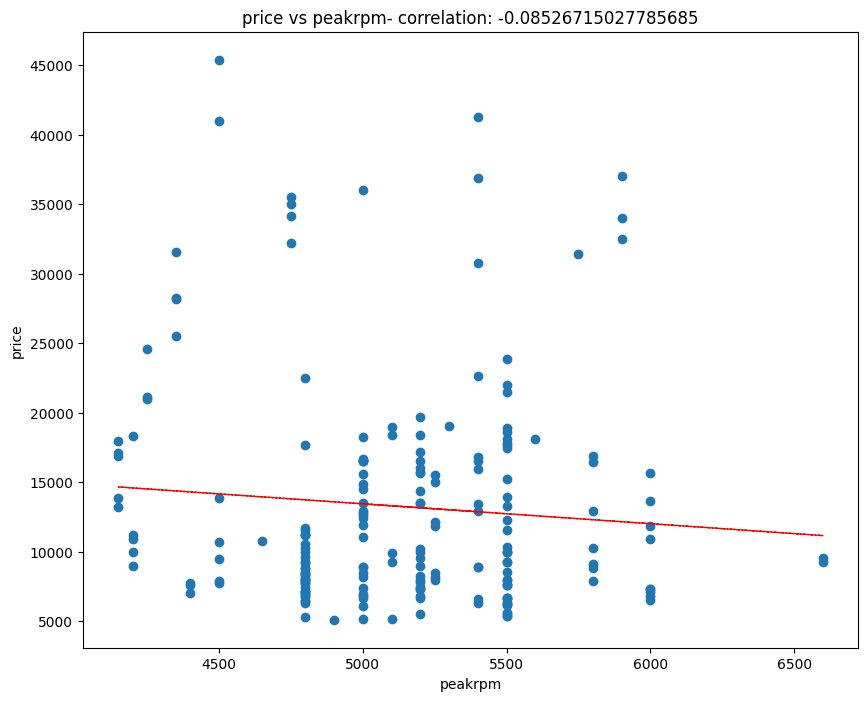

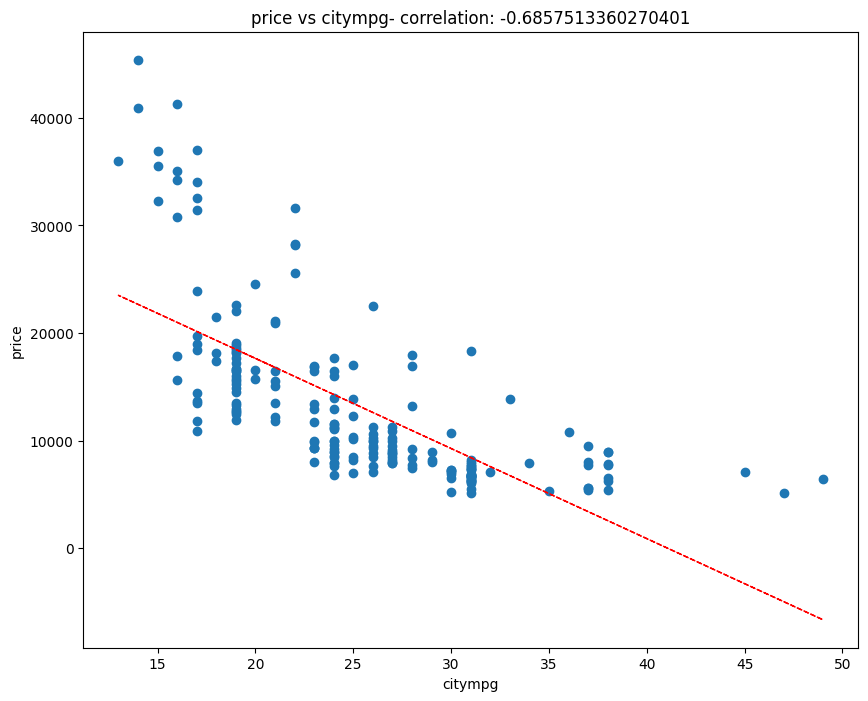

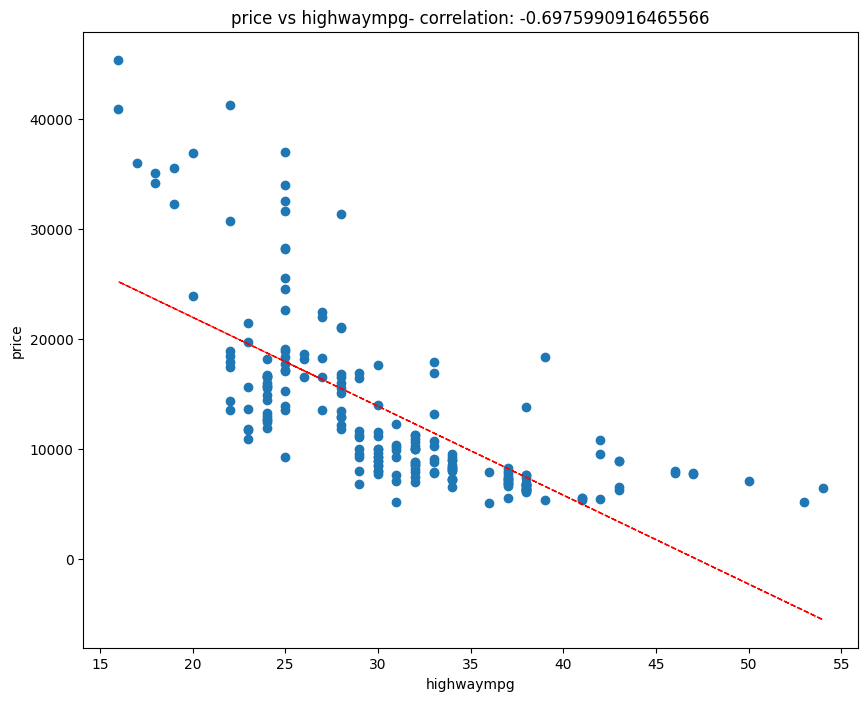

In [13]:
for col in numeric_features[1:-1]:
  fig = plt.figure(figsize = (10,8))
  ax = fig.gca()
  feature = dataset[col]
  label = dataset["price"]
  correlation = feature.corr(label)
  plt.scatter(x = feature, y = label)
  plt.xlabel(col)
  plt.ylabel("price")
  ax.set_title('price vs ' + col + '- correlation: ' + str(correlation))
  z = np.polyfit(feature, dataset["price"],1)
  y_hat = np.poly1d(z)(feature)

  plt.plot( feature, y_hat, "r--", lw = 1)

plt.show()

<Axes: >

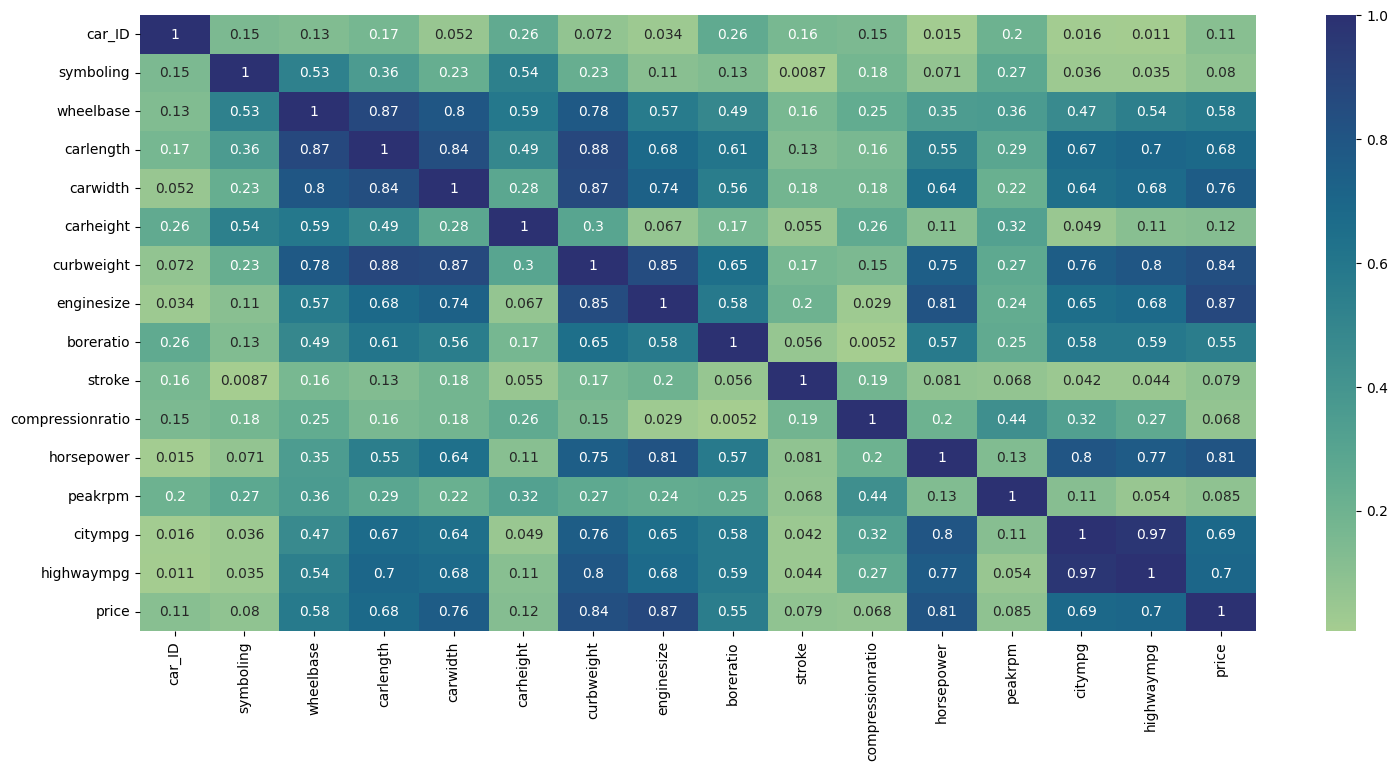

In [14]:
## Check for correlation
fig = plt.figure(figsize = (18,8))
correlation = dataset.corr()
sns.heatmap(abs(correlation), annot = True , cmap = "crest" )

In [15]:
dataset["mileage"] = 0.6*dataset["citympg"] + 0.4*dataset["highwaympg"]
dataset["car_area"] = dataset["carlength"] * dataset["carwidth"]

In [16]:
## VIF - Variance Inflation Factor for Multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):

  vif = pd.DataFrame()
  vif["Variables"] = X.columns
  vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

  return vif
  


In [17]:
print(dataset.describe().columns)
print("\n\n\n")
print(dataset.columns)

Index(['car_ID', 'symboling', 'wheelbase', 'carlength', 'carwidth',
       'carheight', 'curbweight', 'enginesize', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price', 'mileage', 'car_area'],
      dtype='object')




Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price', 'mileage', 'car_area'],
      dtype='object')


In [18]:
calc_vif(dataset[[i for i in dataset.describe().columns if i not in ["car_ID", "price" ]]])

,Variables,VIF
0,symboling,2.646796
1,wheelbase,2316.959780
2,carlength,6136.028870
3,carwidth,3170.397591
4,carheight,1108.503341
5,curbweight,415.172460
6,enginesize,68.941339
7,boreratio,326.471548
8,stroke,132.074737
9,compressionratio,16.465709


In [19]:
## Now we remove "citympg" and "highwaympg" because we have derived "mileage" variable from them and -
## also we remove "carlength" and "carwidth" because we have derived the "car_area" variable from them.

calc_vif(dataset[[i for i in dataset.describe().columns if i not in ["car_ID", "price", "citympg", "highwaympg", "carlength", "carwidth"]]])

,Variables,VIF
0,symboling,2.055617
1,wheelbase,1981.325782
2,carheight,825.908353
3,curbweight,406.251907
4,enginesize,67.262383
5,boreratio,261.276569
6,stroke,120.599905
7,compressionratio,15.829665
8,horsepower,58.898896
9,peakrpm,190.656419


<Axes: >

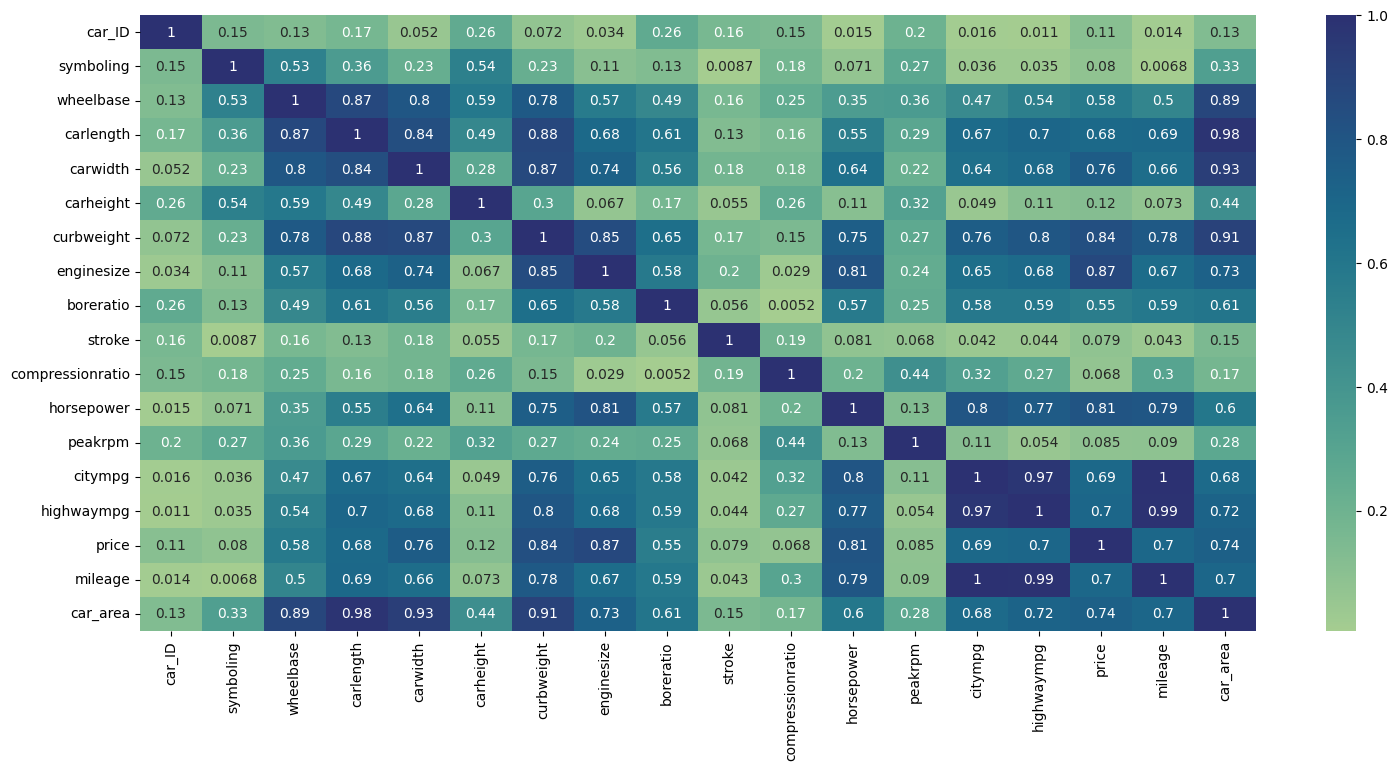

In [20]:
## check for correlation with new variables again
fig = plt.figure(figsize = (18,8))
correlation = dataset.corr()
sns.heatmap(abs(correlation), annot = True , cmap = "crest" )

### <b><i> In the above vif analysis we can observe that "car_area" and "wheelbase" have strong correlation and similar vif values. So we check for their correaltion with "price" and remove whicever variable has lower correaltion with "price". In this case "wheelbase" has lower correlation. Let's calculate vif without "wheelbase" variable and see what happens.

In [21]:
calc_vif(dataset[[i for i in dataset.describe().columns if i not in ["car_ID", "price", "citympg", "highwaympg", "carlength", "carwidth", "wheelbase"]]])

,Variables,VIF
0,symboling,1.918068
1,carheight,685.266009
2,curbweight,391.741228
3,enginesize,67.005317
4,boreratio,251.628966
5,stroke,115.419047
6,compressionratio,15.594990
7,horsepower,55.174355
8,peakrpm,180.248036
9,mileage,84.886422


In [22]:
calc_vif(dataset[[i for i in dataset.describe().columns if i not in ["car_ID", "price", "citympg", "highwaympg", "carlength", "carwidth", "wheelbase","carheight"]]])

,Variables,VIF
0,symboling,1.872372
1,curbweight,380.155301
2,enginesize,65.623076
3,boreratio,223.339836
4,stroke,115.200901
5,compressionratio,15.207925
6,horsepower,52.742677
7,peakrpm,160.265513
8,mileage,66.673508
9,car_area,592.594352


### <b><i> Contuinuing in the same way we'll be left with the following values which have vif less than 10

In [23]:
calc_vif(dataset[[i for i in dataset.describe().columns if i not in ['car_ID','symboling','price','citympg','highwaympg','company_cat','price_mean','carwidth','carlength','carheight','car_vol','car_den','wheelbase','car_area','peakrpm','stroke','horsepower','boreratio','curbweight']]])


,Variables,VIF
0,enginesize,5.170320
1,compressionratio,9.119143
2,mileage,8.201171


In [24]:
numerical_features = ['enginesize','compressionratio','mileage']

In [25]:
dataset["CarName"].unique()

array(['alfa-romero giulia', 'alfa-romero stelvio',
       'alfa-romero Quadrifoglio', 'audi 100 ls', 'audi 100ls',
       'audi fox', 'audi 5000', 'audi 4000', 'audi 5000s (diesel)',
       'bmw 320i', 'bmw x1', 'bmw x3', 'bmw z4', 'bmw x4', 'bmw x5',
       'chevrolet impala', 'chevrolet monte carlo', 'chevrolet vega 2300',
       'dodge rampage', 'dodge challenger se', 'dodge d200',
       'dodge monaco (sw)', 'dodge colt hardtop', 'dodge colt (sw)',
       'dodge coronet custom', 'dodge dart custom',
       'dodge coronet custom (sw)', 'honda civic', 'honda civic cvcc',
       'honda accord cvcc', 'honda accord lx', 'honda civic 1500 gl',
       'honda accord', 'honda civic 1300', 'honda prelude',
       'honda civic (auto)', 'isuzu MU-X', 'isuzu D-Max ',
       'isuzu D-Max V-Cross', 'jaguar xj', 'jaguar xf', 'jaguar xk',
       'maxda rx3', 'maxda glc deluxe', 'mazda rx2 coupe', 'mazda rx-4',
       'mazda glc deluxe', 'mazda 626', 'mazda glc', 'mazda rx-7 gs',
       'mazda glc 

In [26]:
dataset["company"] = dataset["CarName"].str.split(" ", expand = True)[0]
dataset["company"] = dataset["company"].replace({"maxda" : "mazda", "porcshce" : "porsche", "toyouta" : "toyota", "vokswagen" : "volkswagen", "vw" : "volkswagen"})

dataset["company"] = dataset["company"].str.upper()
dataset["company"].value_counts()

TOYOTA         32
NISSAN         18
MAZDA          17
MITSUBISHI     13
HONDA          13
VOLKSWAGEN     12
SUBARU         12
PEUGEOT        11
VOLVO          11
DODGE           9
BUICK           8
BMW             8
AUDI            7
PLYMOUTH        7
SAAB            6
PORSCHE         5
ISUZU           4
JAGUAR          3
CHEVROLET       3
ALFA-ROMERO     3
RENAULT         2
MERCURY         1
Name: company, dtype: int64

In [27]:
categorical_features = dataset.describe(include=['object','category']).columns

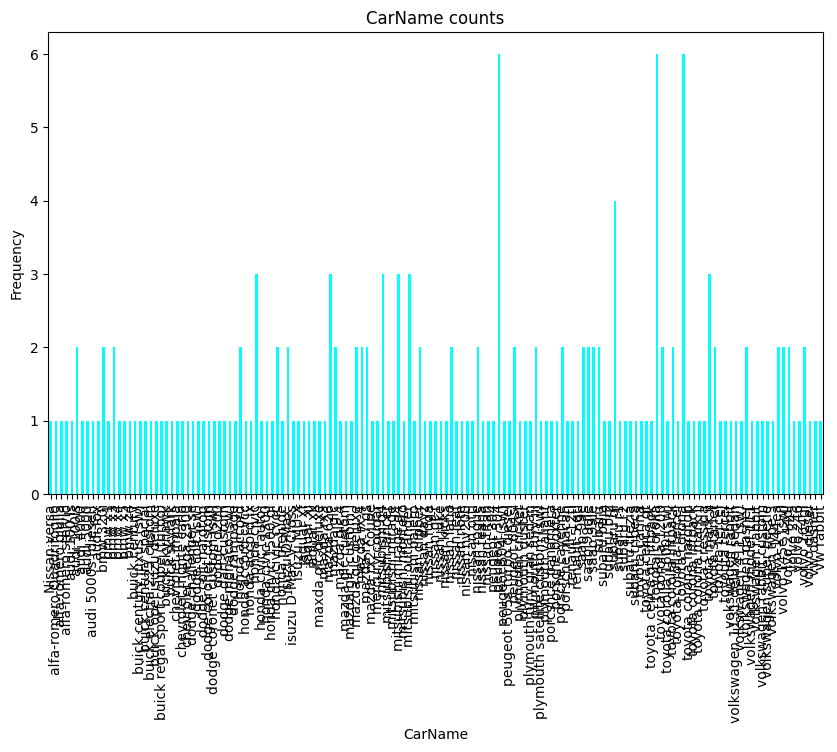

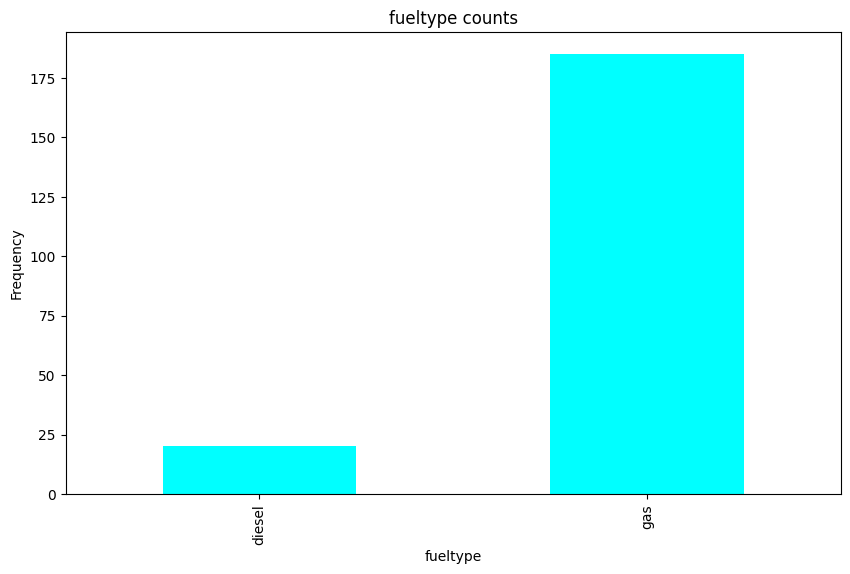

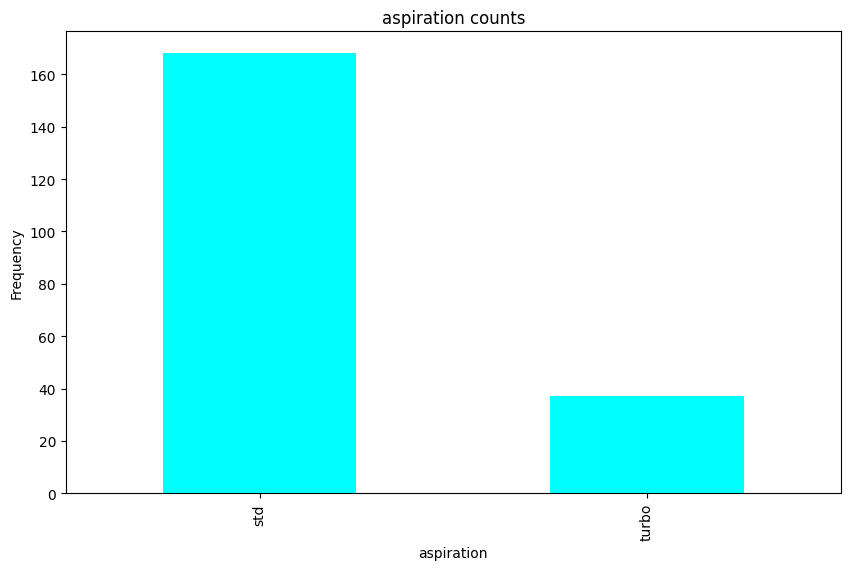

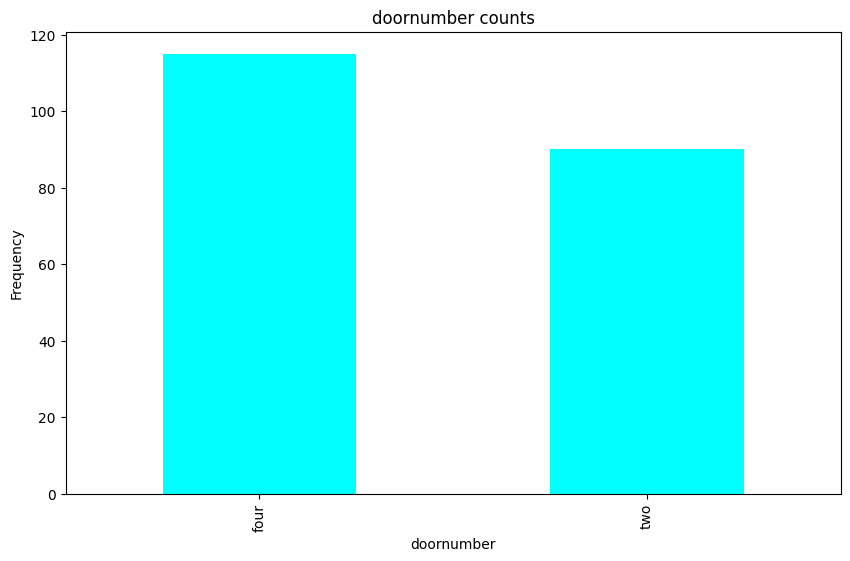

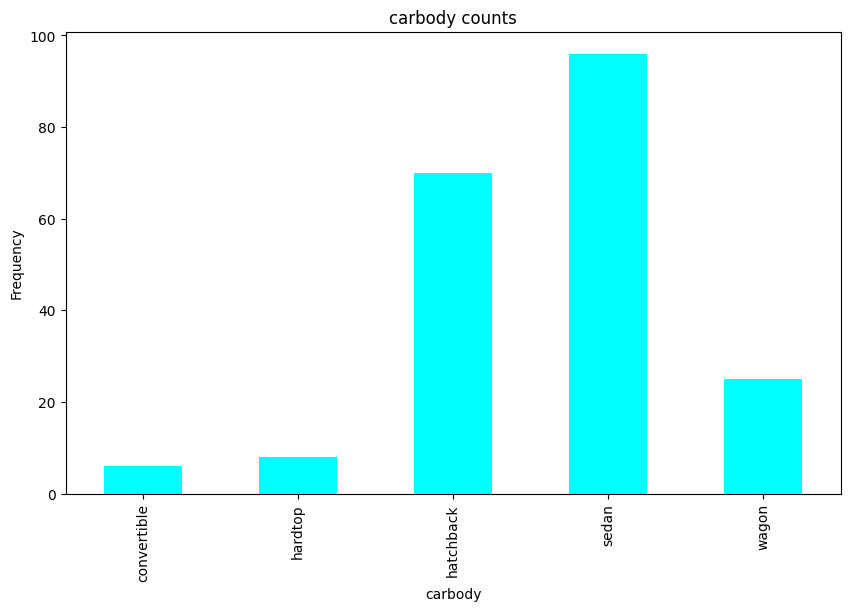

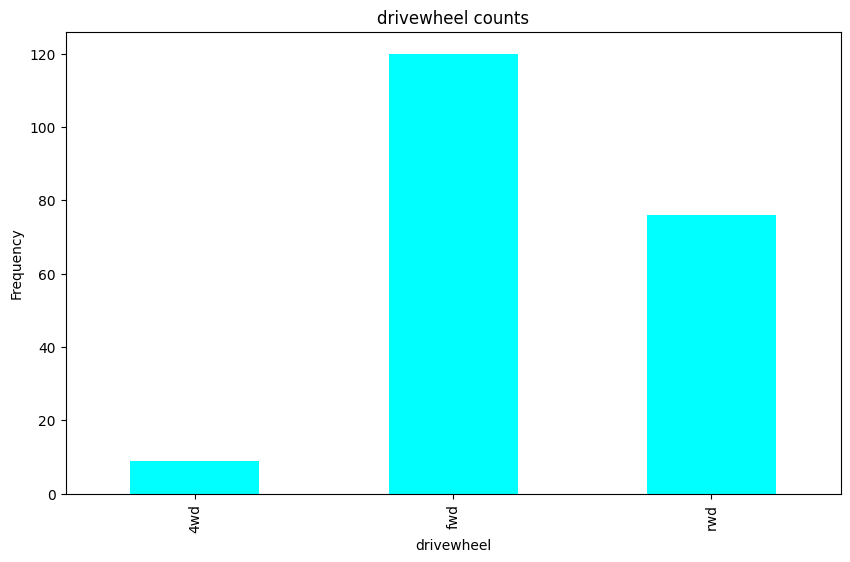

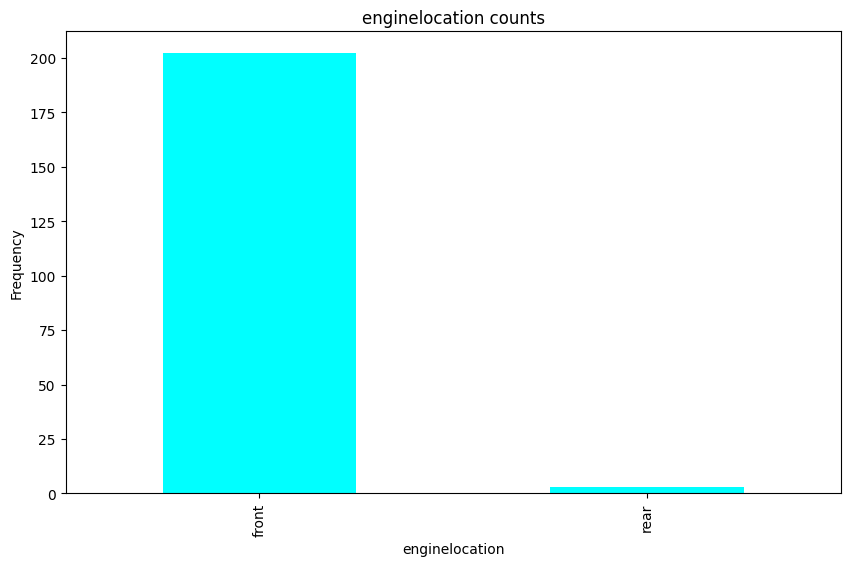

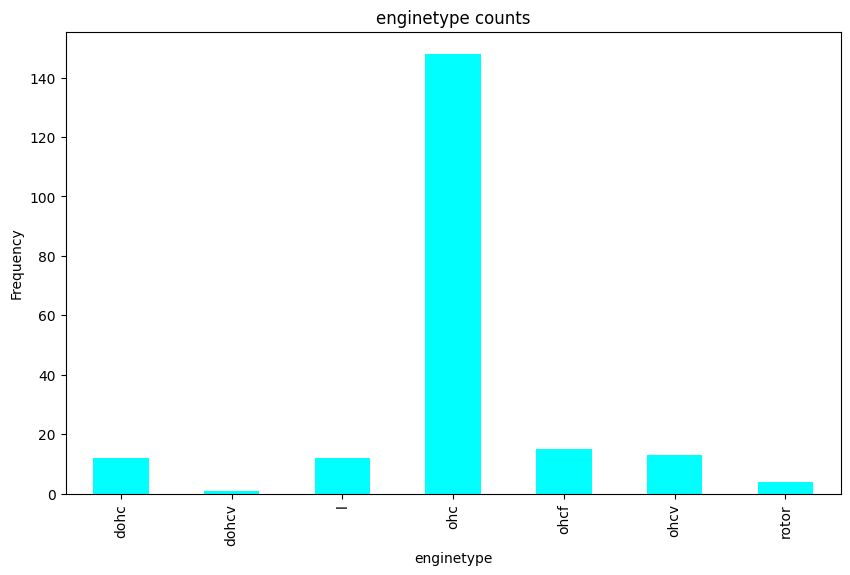

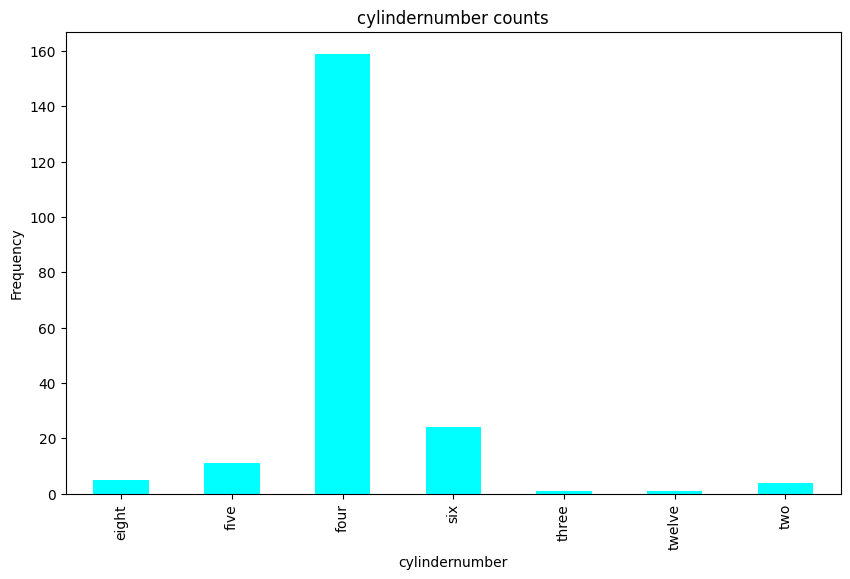

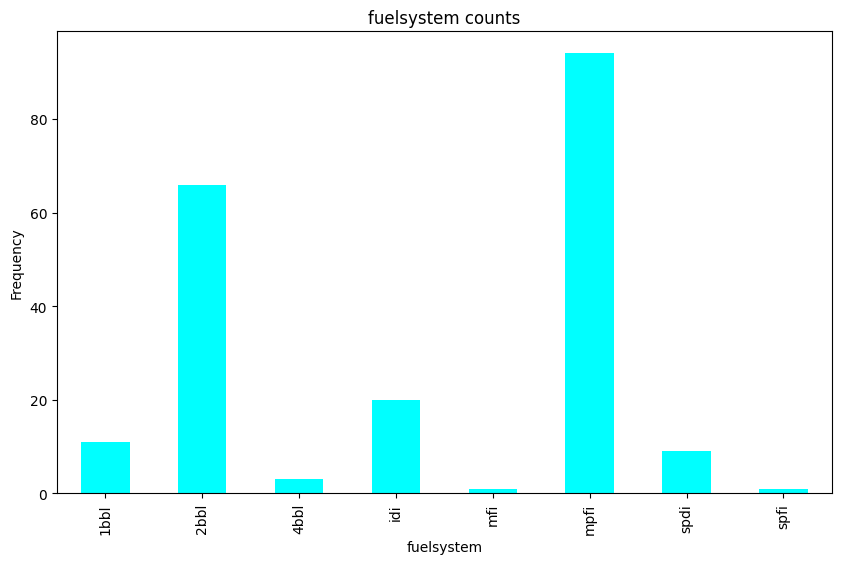

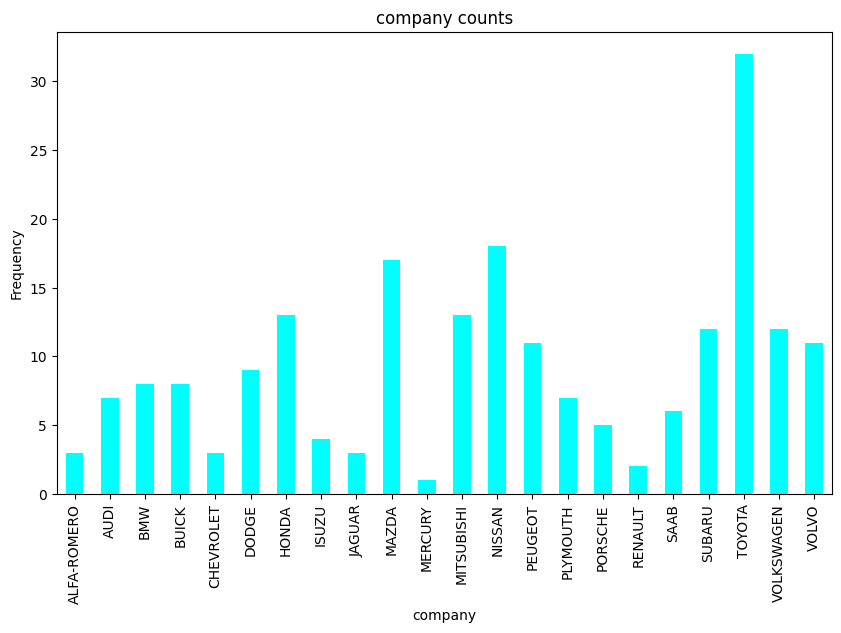

In [28]:
for col in categorical_features:
  counts = dataset[col].value_counts().sort_index()
  fig = plt.figure(figsize = (10,6))
  ax = fig.gca()
  counts.plot.bar(ax = ax, color = "cyan")
  ax.set_title(col + ' counts')
  ax.set_xlabel(col) 
  ax.set_ylabel("Frequency")
plt.show()


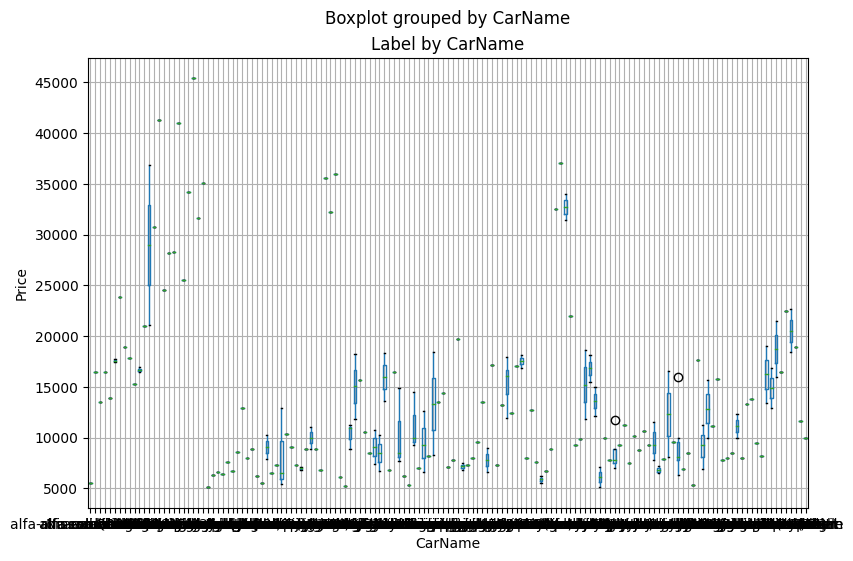

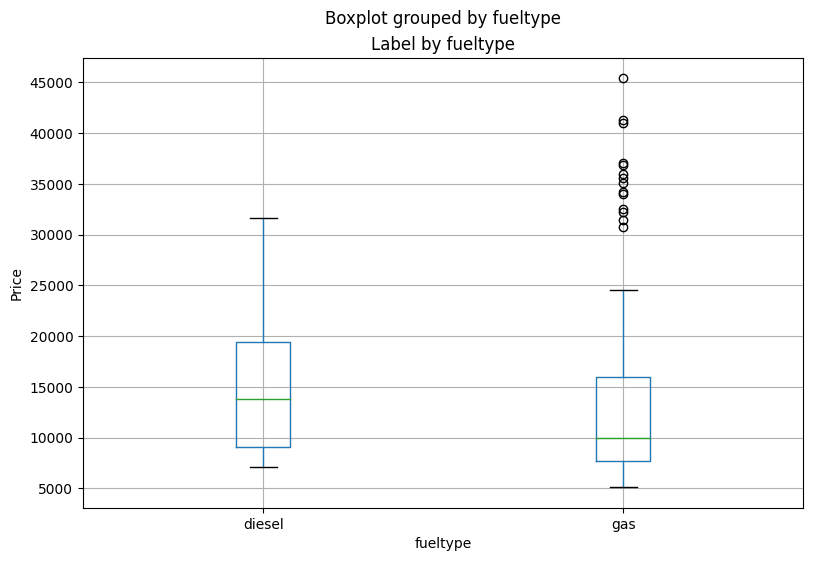

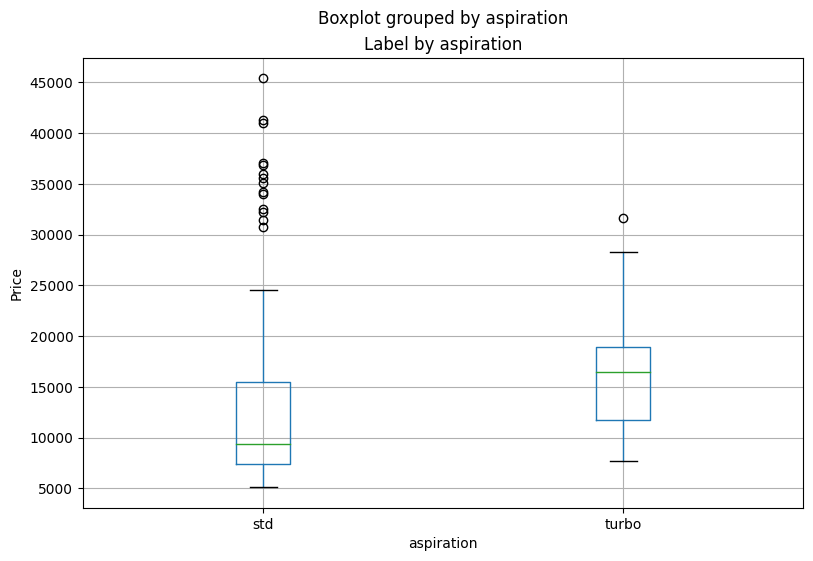

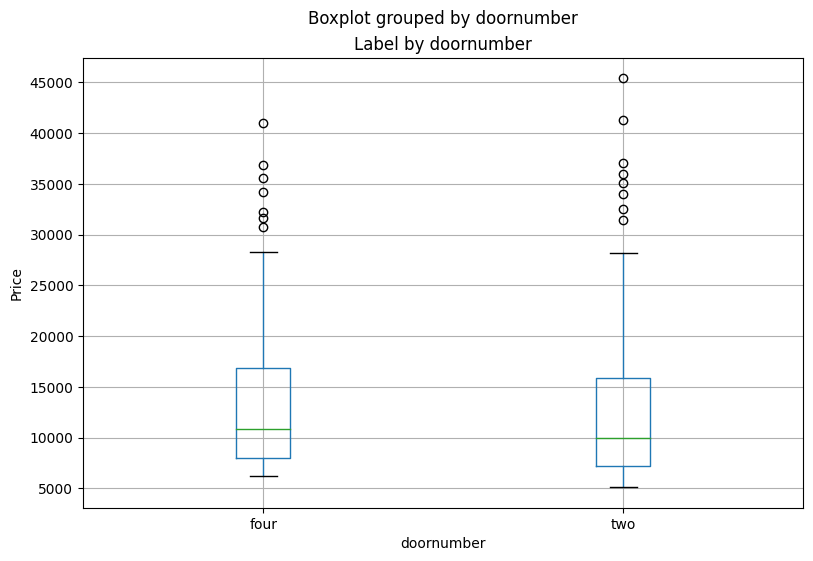

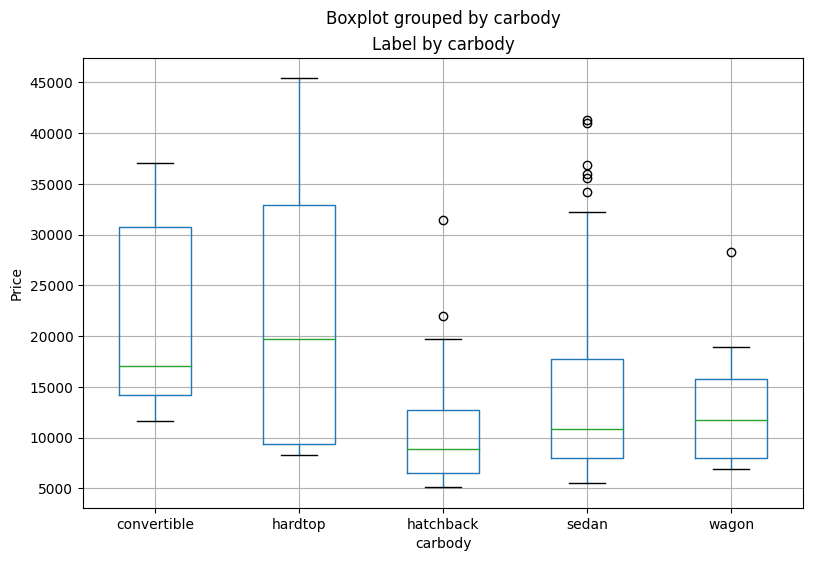

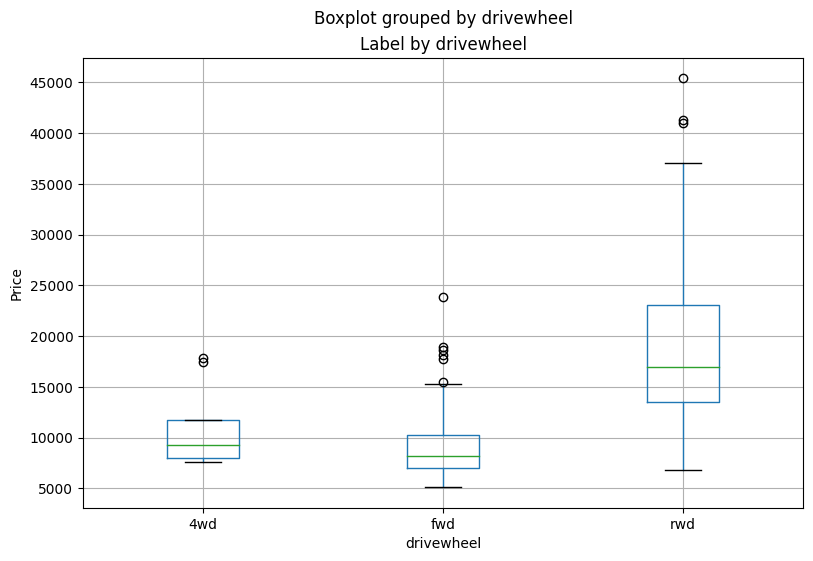

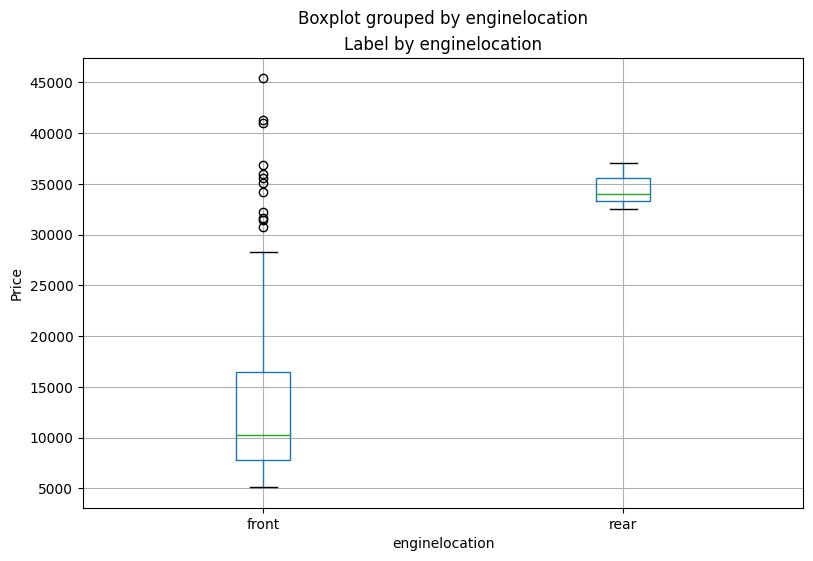

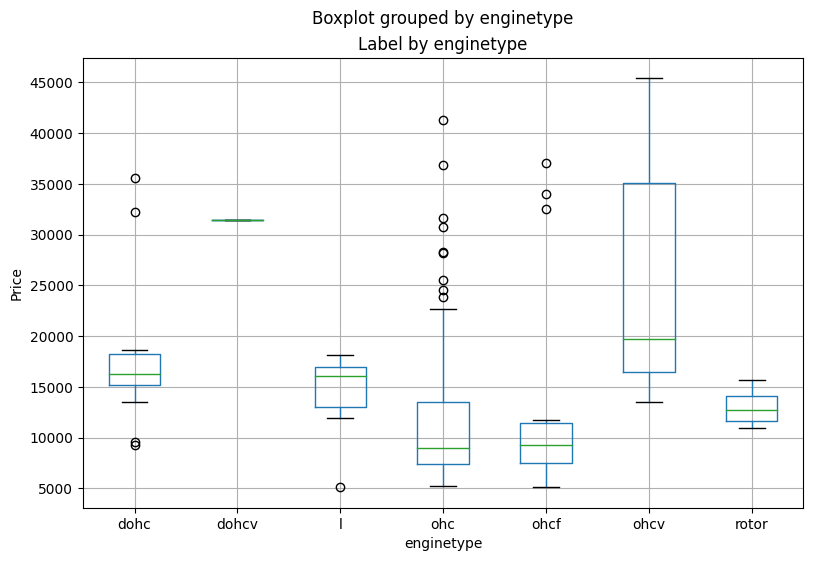

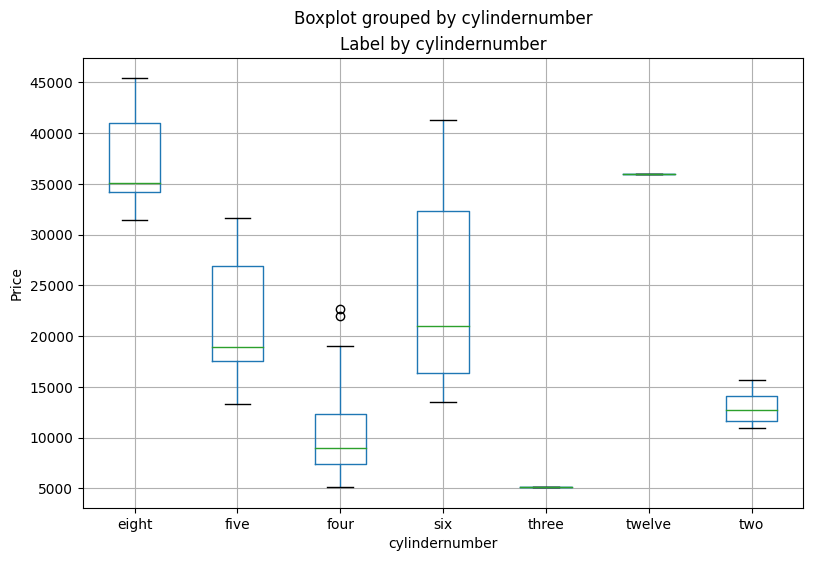

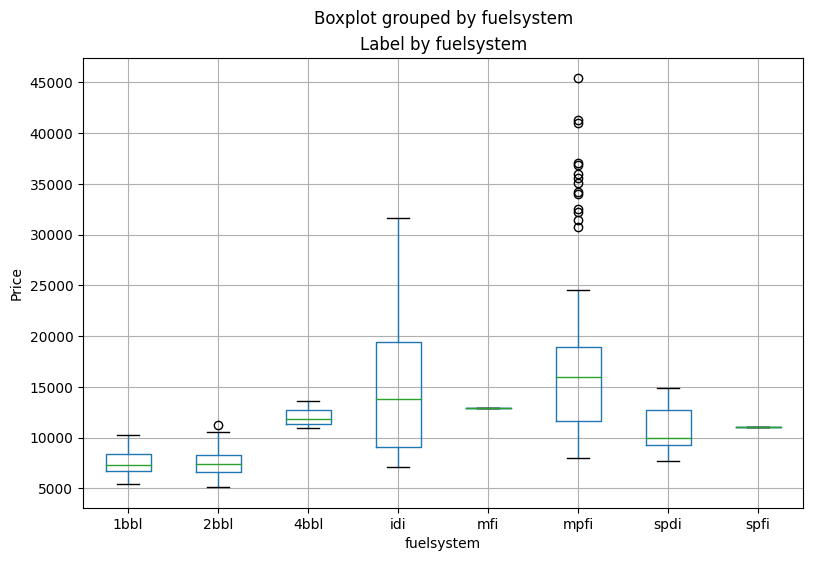

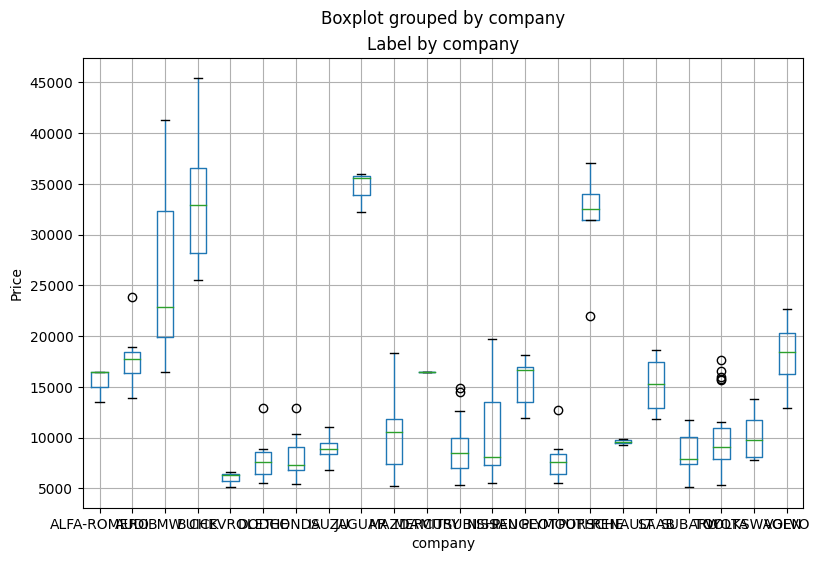

In [29]:
for col in categorical_features:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    dataset.boxplot(column = 'price', by = col, ax = ax)
    ax.set_title('Label by ' + col)
    ax.set_ylabel("Price")
plt.show()

<Figure size 3000x2200 with 0 Axes>

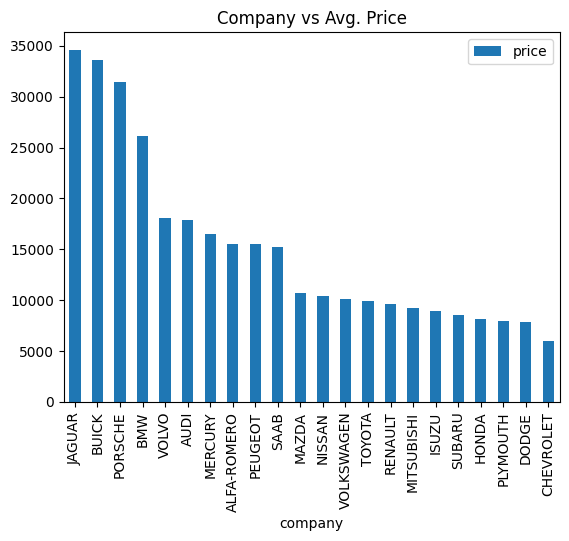

In [30]:
plt.figure(figsize = (30,22))
df_autox = pd.DataFrame(dataset.groupby(["company"])["price"].mean().sort_values(ascending = False))
df_autox.plot.bar()
plt.title("Company vs Avg. Price")
plt.show()

In [31]:
df_autox.rename(columns ={"price" : "price_mean"}, inplace = True)

In [32]:
dataset = dataset.merge(df_autox, on = "company", how = "left")

In [33]:
dataset['company_cat'] = dataset['price_mean'].apply(lambda x : 0 if x < 12000 else (1 if 12000 <= x < 24000 else 2))


In [34]:
dataset.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,horsepower,peakrpm,citympg,highwaympg,price,mileage,car_area,company,price_mean,company_cat
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,111,5000,21,27,13495.0,23.4,10820.08,ALFA-ROMERO,15498.333333,1
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,111,5000,21,27,16500.0,23.4,10820.08,ALFA-ROMERO,15498.333333,1
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,154,5000,19,26,16500.0,21.8,11213.60,ALFA-ROMERO,15498.333333,1
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,102,5500,24,30,13950.0,26.4,11690.92,AUDI,17859.166714,1
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,115,5500,18,22,17450.0,19.6,11726.24,AUDI,17859.166714,1


In [35]:
correlation.price

car_ID             -0.109093
symboling          -0.079978
wheelbase           0.577816
carlength           0.682920
carwidth            0.759325
carheight           0.119336
curbweight          0.835305
enginesize          0.874145
boreratio           0.553173
stroke              0.079443
compressionratio    0.067984
horsepower          0.808139
peakrpm            -0.085267
citympg            -0.685751
highwaympg         -0.697599
price               1.000000
mileage            -0.695484
car_area            0.738052
Name: price, dtype: float64

### <b> Data Preparation

In [36]:
dataset_pr = dataset.copy()

In [37]:
dataset.shape == dataset_pr.shape

True

In [38]:
dataset_pr.shape

(205, 31)

In [39]:
dataset.fuelsystem.value_counts()

mpfi    94
2bbl    66
idi     20
1bbl    11
spdi     9
4bbl     3
mfi      1
spfi     1
Name: fuelsystem, dtype: int64

In [40]:
### Data encoding
#label encoding
encoders_nums = {"fueltype":{"diesel":1,"gas":0},
                 "aspiration":{"turbo":1,"std":0},
                 "doornumber":     {"four": 4, "two": 2},
                 "drivewheel":{"fwd":0,"4wd":0,"rwd":1},
                 "cylindernumber":{"four": 4, "six": 6, "five": 5, "eight": 8,
                                  "two": 2, "twelve": 12, "three":3 }
                 }

dataset_pr = dataset_pr.replace(encoders_nums)


In [41]:
dataset_pr.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,horsepower,peakrpm,citympg,highwaympg,price,mileage,car_area,company,price_mean,company_cat
0,1,3,alfa-romero giulia,0,0,2,convertible,1,front,88.6,...,111,5000,21,27,13495.0,23.4,10820.08,ALFA-ROMERO,15498.333333,1
1,2,3,alfa-romero stelvio,0,0,2,convertible,1,front,88.6,...,111,5000,21,27,16500.0,23.4,10820.08,ALFA-ROMERO,15498.333333,1
2,3,1,alfa-romero Quadrifoglio,0,0,2,hatchback,1,front,94.5,...,154,5000,19,26,16500.0,21.8,11213.60,ALFA-ROMERO,15498.333333,1
3,4,2,audi 100 ls,0,0,4,sedan,0,front,99.8,...,102,5500,24,30,13950.0,26.4,11690.92,AUDI,17859.166714,1
4,5,2,audi 100ls,0,0,4,sedan,0,front,99.4,...,115,5500,18,22,17450.0,19.6,11726.24,AUDI,17859.166714,1


In [42]:
dataset_pr = pd.get_dummies(dataset_pr, columns=["carbody", "enginetype","fuelsystem"], prefix=["body", "etype","fsystem"])

In [43]:
dataset_pr.columns


Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'drivewheel', 'enginelocation', 'wheelbase', 'carlength',
       'carwidth', 'carheight', 'curbweight', 'cylindernumber', 'enginesize',
       'boreratio', 'stroke', 'compressionratio', 'horsepower', 'peakrpm',
       'citympg', 'highwaympg', 'price', 'mileage', 'car_area', 'company',
       'price_mean', 'company_cat', 'body_convertible', 'body_hardtop',
       'body_hatchback', 'body_sedan', 'body_wagon', 'etype_dohc',
       'etype_dohcv', 'etype_l', 'etype_ohc', 'etype_ohcf', 'etype_ohcv',
       'etype_rotor', 'fsystem_1bbl', 'fsystem_2bbl', 'fsystem_4bbl',
       'fsystem_idi', 'fsystem_mfi', 'fsystem_mpfi', 'fsystem_spdi',
       'fsystem_spfi'],
      dtype='object')

In [44]:
features = numerical_features.copy()
features.extend(['fueltype','aspiration','doornumber','drivewheel','cylindernumber','company_cat','body_convertible',
       'body_hardtop', 'body_hatchback', 'body_sedan', 'body_wagon','etype_dohc', 'etype_l', 'etype_ohc', 'etype_ohcf',
       'etype_ohcv','fsystem_1bbl', 'fsystem_2bbl'
       , 'fsystem_idi', 'fsystem_mpfi',
       'fsystem_spdi'])

In [45]:
features

['enginesize',
 'compressionratio',
 'mileage',
 'fueltype',
 'aspiration',
 'doornumber',
 'drivewheel',
 'cylindernumber',
 'company_cat',
 'body_convertible',
 'body_hardtop',
 'body_hatchback',
 'body_sedan',
 'body_wagon',
 'etype_dohc',
 'etype_l',
 'etype_ohc',
 'etype_ohcf',
 'etype_ohcv',
 'fsystem_1bbl',
 'fsystem_2bbl',
 'fsystem_idi',
 'fsystem_mpfi',
 'fsystem_spdi']

In [46]:
from scipy.stats import zscore
X = dataset_pr[features].apply(zscore)

In [47]:
y = np.log10(dataset_pr["price"])

In [48]:
## Train test split

X_train,X_test,y_train,y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

print(X_train.shape)
print(X_test.shape)


(164, 24)
(41, 24)


In [49]:
reg = LinearRegression().fit(X_train, y_train)

In [50]:
reg.score(X_train, y_train)

0.9324420504983304

In [51]:
print(f"Coefficients: {reg.coef_}")
print("\n")
print(f"Intercept: {reg.intercept_}")

Coefficients: [ 0.07683825  0.01590146 -0.05608906  0.00149697  0.02135358  0.01543893
  0.01238109  0.00031735  0.06565892  0.01437322  0.0005336  -0.00028112
  0.00042538 -0.00796079 -0.04125975 -0.05110849 -0.0658886  -0.03672994
 -0.04472375 -0.00052948 -0.01768536  0.00149697  0.01790728 -0.00753211]


Intercept: 4.059743198935876


In [52]:
## This is log transformed predictions of price as we have scaled the price variable using log trasformation before implementing the Linear Regression.
## To get the original predictions we have to take 10**y_pred for each value as [ loga(m) = x <=> m = a**x ; where loga is log to the base a. ]
y_pred = reg.predict(X_test)
y_pred

array([3.81967552, 4.13714622, 4.17646819, 3.56301623, 4.00910128,
       4.0881102 , 3.78244388, 3.86958683, 4.15481411, 3.87647818,
       4.3307769 , 4.57347531, 4.11445435, 4.05412396, 3.80023554,
       4.08476194, 4.03989491, 4.18239791, 3.92761811, 3.85263527,
       3.97322164, 4.13566249, 4.03251989, 4.08476194, 4.14866948,
       3.84357219, 3.87365512, 4.11048216, 3.89255312, 3.8372148 ,
       3.96211116, 3.98838418, 4.32026565, 4.00589168, 3.86832486,
       4.45577252, 4.07673423, 4.17242568, 3.81943108, 4.62804648,
       3.76912549])

In [53]:
MSE = mean_squared_error(10**(y_test), 10**(y_pred))
print(f"MSE : {MSE}")

RMSE = np.sqrt(MSE)
print(f"RMSE : {RMSE}")

MSE : 8981848.585185597
RMSE : 2996.9732373155416


In [54]:
r2 = r2_score(10**(y_test), 10**(y_pred))
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score(10**(y_test), 10**(y_pred)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

R2 : 0.8839799650687881
Adjusted R2 :  0.7099499126719702


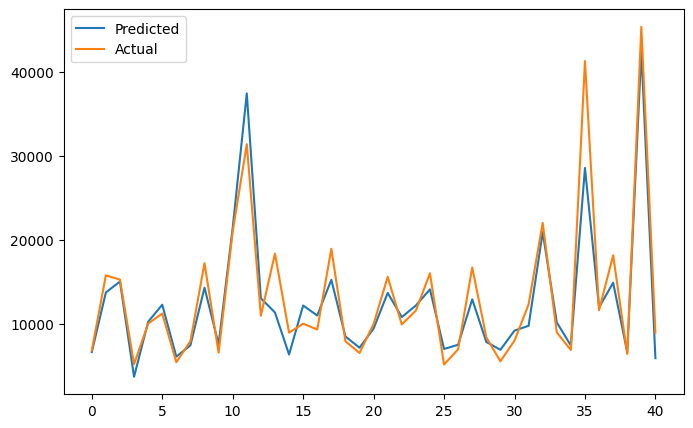

In [55]:
plt.figure(figsize=(8,5))
plt.plot(10**(y_pred))
plt.plot(np.array(10**(y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

## <b> Lasso Regression

In [56]:
from sklearn.linear_model import Lasso
lasso = Lasso(alpha = 0.1, max_iter = 3000)

lasso.fit(X_train, y_train)

Lasso(alpha=0.1, max_iter=3000)

In [57]:
lasso.score(X_train, y_train)

0.5843799787551645

In [58]:
y_pred_lasso = lasso.predict(X_test)

In [59]:
MSE = mean_squared_error(10**(y_test), 10**(y_pred_lasso))
print(f"MSE : {MSE}")

print("\n")

RMSE = np.sqrt(MSE)
print(f"RMSE : {RMSE}")

print("\n")

r2 = r2_score(10**(y_test), 10**(y_pred_lasso))
print(f"R2 : {r2}")
print("\n")
print(f"Adjusted R2 : {1-(1-r2_score(10**(y_test), 10**(y_pred_lasso)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))}")

MSE : 41045022.19389814


RMSE : 6406.638915523345


R2 : 0.46981460848239964


Adjusted R2 : -0.32546347879400095


# <b>Cross Validation

In [60]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge, ElasticNet

### <b> <I> Lasso

In [61]:
lasso = Lasso()
parameters = {"alpha":[1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100]}
lasso_regressor = GridSearchCV(lasso, parameters, cv= 5, scoring = "neg_mean_squared_error")
lasso_regressor.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100]},
             scoring='neg_mean_squared_error')

In [62]:
print(f"The best fit alpha value is : {lasso_regressor.best_params_}")
print(f"\n Using {lasso_regressor.best_params_} the negative MSE is {lasso_regressor.best_score_}")

The best fit alpha value is : {'alpha': 0.001}

 Using {'alpha': 0.001} the negative MSE is -0.004800882726968735


In [63]:
y_pred_lasso = lasso_regressor.predict(X_test)

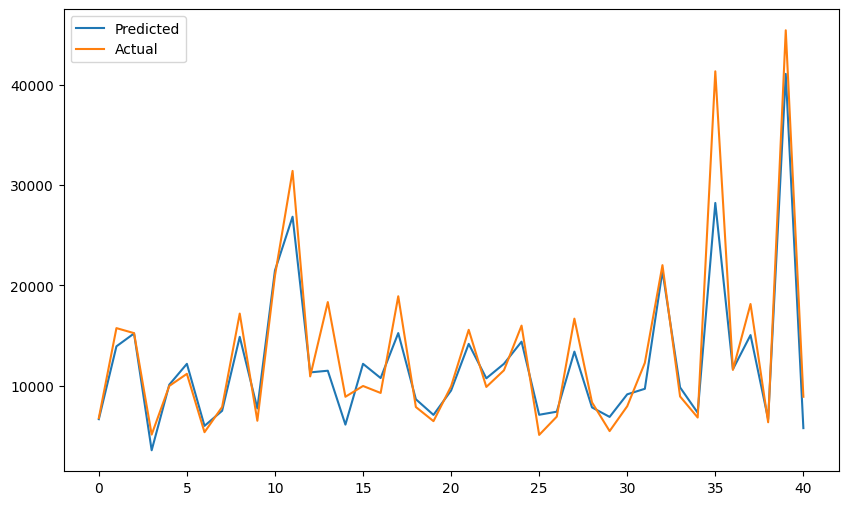

In [64]:
plt.figure(figsize = (10,6))
plt.plot(10**(y_pred_lasso))
plt.plot(10**(np.array(y_test)))
plt.legend(["Predicted", "Actual"])
plt.show()

In [65]:
MSE  = mean_squared_error(10**(y_test), 10**(y_pred_lasso))
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score(10**(y_test), 10**(y_pred_lasso))
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score(10**(y_test), 10**(y_pred_lasso)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE : 8630691.066403879
RMSE : 2937.8037828289143
R2 : 0.8885159252566063
Adjusted R2 :  0.7212898131415157


### <B><I> Ridge

In [66]:
ridge = Ridge(alpha=0.1)

In [67]:
ridge.fit(X_train,y_train)

Ridge(alpha=0.1)

In [68]:
ridge.score(X_train,y_train)

0.9324370952031874

In [69]:
y_pred_r = ridge.predict(X_test)

In [70]:
MSE  = mean_squared_error(10**(y_test), 10**(y_pred_r))
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score(10**(y_test), 10**(y_pred_r))
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score(10**(y_test), 10**(y_pred_r)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE : 8854606.545200933
RMSE : 2975.6690920196306
R2 : 0.8856235717031827
Adjusted R2 :  0.7140589292579569


#### <I> Grid Search Cross Validation for Ridge

In [71]:
ridge = Ridge()
parameters = {'alpha': [1e-15,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1,5,10,20,30,40,45,50,55,60,100]}
ridge_regressor = GridSearchCV(ridge, parameters, cv = 5, scoring = "neg_mean_squared_error")
ridge_regressor.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 1e-05, 0.0001, 0.001,
                                   0.01, 1, 5, 10, 20, 30, 40, 45, 50, 55, 60,
                                   100]},
             scoring='neg_mean_squared_error')

In [72]:
print(f"The best fit alpha value is : {ridge_regressor.best_params_}")
print(f"\n Using the alpha value {ridge_regressor.best_params_} the negative MSE is {ridge_regressor.best_score_}")

The best fit alpha value is : {'alpha': 10}

 Using the alpha value {'alpha': 10} the negative MSE is -0.004787462507818082


In [73]:
y_pred_ridge = ridge_regressor.predict(X_test)

In [74]:
MSE  = mean_squared_error(10**(y_test), 10**(y_pred_ridge))
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score(10**(y_test), 10**(y_pred_ridge))
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score(10**(y_test), 10**(y_pred_ridge)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE : 8984799.748595953
RMSE : 2997.4655541967372
R2 : 0.8839418443992277
Adjusted R2 :  0.7098546109980693


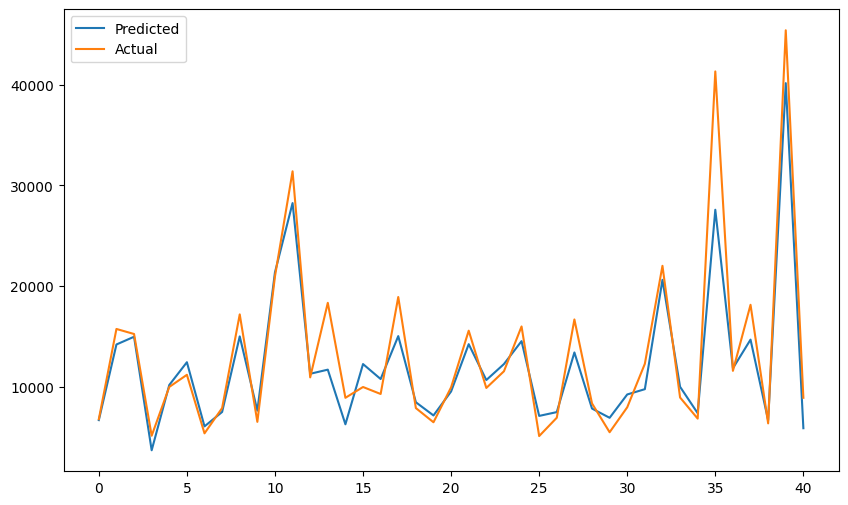

In [75]:
plt.figure(figsize=(10,6))
plt.plot(10**(y_pred_ridge))
plt.plot(10**(np.array(y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

### <B><I> ElasticNet Regression

In [76]:
elasticnet = ElasticNet(alpha = 0.1, l1_ratio = 0.5)

In [77]:
elasticnet.fit(X_train, y_train)

ElasticNet(alpha=0.1)

In [78]:
elasticnet.score(X_train, y_train)

0.8099052859923915

In [79]:
y_pred_en = elasticnet.predict(X_test)

In [80]:
MSE  = mean_squared_error(10**(y_test), 10**(y_pred_en))
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score(10**(y_test), 10**(y_pred_en))
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score(10**(y_test), 10**(y_pred_en)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE : 19925825.06482187
RMSE : 4463.835241675242
R2 : 0.7426147971513504
Adjusted R2 :  0.3565369928783759


#### <I> Grid Search Cross Validation for Elastic Net 

In [81]:
elastic = ElasticNet()
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100],'l1_ratio':[0.3,0.4,0.5,0.6,0.7,0.8]}
elastic_regressor = GridSearchCV(elastic, parameters, cv = 5, scoring = "neg_mean_squared_error")
elastic_regressor.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=ElasticNet(),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100],
                         'l1_ratio': [0.3, 0.4, 0.5, 0.6, 0.7, 0.8]},
             scoring='neg_mean_squared_error')

In [82]:
y_pred_elastic = elastic_regressor.predict(X_test)

In [83]:
print(f"The best alpha value is : {elastic_regressor.best_params_} ")
print(f"\n Using {elastic_regressor.best_params_} the negative MSE is {elastic_regressor.best_score_}")

The best alpha value is : {'alpha': 0.01, 'l1_ratio': 0.5} 

 Using {'alpha': 0.01, 'l1_ratio': 0.5} the negative MSE is -0.004799769352225591


In [84]:
MSE  = mean_squared_error(10**(y_test), 10**(y_pred_elastic))
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score(10**(y_test), 10**(y_pred_elastic))
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score(10**(y_test), 10**(y_pred_elastic)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE : 8338799.785389021
RMSE : 2887.698007996858
R2 : 0.8922863335749246
Adjusted R2 :  0.7307158339373114


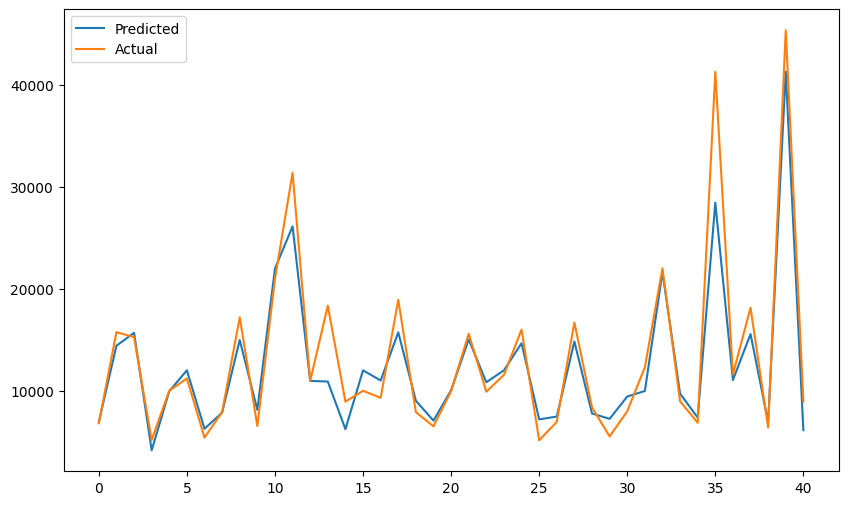

In [85]:
plt.figure(figsize=(10,6))
plt.plot(10**(y_pred_elastic))
plt.plot(10**(np.array(y_test)))
plt.legend(["Predicted","Actual"])
plt.show()